# Introduction

In this analysis, we're going take a look at MLB team data from the [Lahman Database](http://www.seanlahman.com/baseball-archive/statistics/) and use it to write a model that can predict a team's win total. The initial data set has 2,955 observations and 48 features. This will likely get trimmed down significantly over the course of our analysis as the game has changed significantly over the course of its existence. Thus, it's fairly useless to analyze data from 100 years ago as it has little relevance in today's game.

<br>

__Research Question__
>Can we accurately predict an MLB team's win total in a given season by analyzing their other statistics in that season?

## Variables

Here are the 48 variables featured in our dataset and their descriptions (with our response variable highlighted):

| Variable | Description | Type |
| ------- | ---------- |----|
|yearID    |     Year| Numerical/Discrete|
|lgID     |      League|Categorical/Nominal|
|teamID    |     Team|Categorical/Nominal|
|franchID  |     Franchise (links to TeamsFranchise table)|Categorical/Nominal|
|divID     |     Team's division|Categorical/Nominal|
|Rank     |      Position in final standings|Categorical/Ordinal|
|G      |        Games played|Numerical/Discrete|
|GHome  |        Games played at home|Numerical/Discrete|
|__W__|              __Wins__|__Numerical/Discrete__|
|L      |        Losses|Numerical/Discrete|
|DivWin   |      Division Winner (Y or N)|Categorical/Ordinal|
|WCWin  |        Wild Card Winner (Y or N) |Categorical/Ordinal|
|LgWin  |         League Champion(Y or N)|Categorical/Ordinal|
|WSWin    |      World Series Winner (Y or N)|Categorical/Ordinal|
|R      |        Runs scored|Numerical/Discrete|
|AB       |      At bats|Numerical/Discrete|
|H       |       Hits by batters|Numerical/Discrete|
|2B      |       Doubles|Numerical/Discrete|
|3B      |       Triples|Numerical/Discrete|
|HR     |        Homeruns by batters|Numerical/Discrete|
|BB    |         Walks by batters|Numerical/Discrete|
|SO     |        Strikeouts by batters|Numerical/Discrete|
|SB    |         Stolen bases|Numerical/Discrete|
|CS  |           Caught stealing|Numerical/Discrete|
|HBP     |       Batters hit by pitch|Numerical/Discrete|
|SF    |         Sacrifice flies|Numerical/Discrete|
|RA     |        Opponents runs scored|Numerical/Discrete|
|ER    |         Earned runs allowed|Numerical/Discrete|
|ERA    |        Earned run average|Numerical/Continuous|
|CG       |      Complete games|Numerical/Discrete|
|SHO     |       Shutouts|Numerical/Discrete|
|SV    |         Saves|Numerical/Discrete|
|IPOuts |        Outs Pitched (innings pitched x 3)|Numerical/Discrete|
|HA    |         Hits allowed|Numerical/Discrete|
|HRA      |      Homeruns allowed|Numerical/Discrete|
|BBA    |        Walks allowed|Numerical/Discrete|
|SOA    |        Strikeouts by pitchers|Numerical/Discrete|
|E      |        Errors|Numerical/Discrete|
|DP     |        Double Plays|Numerical/Discrete|
|FP     |        Fielding  percentage|Numerical/Continuous|
|name   |        Team's full name|Categorical/Nominal|
|park   |        Name of team's home ballpark|Categorical/Nominal|
|attendance |    Home attendance total|Numerical/Discrete|
|BPF     |       Three-year park factor for batters|Numerical/Discrete|
|PPF     |       Three-year park factor for pitchers|Numerical/Discrete|
|teamIDBR |      Team ID used by Baseball Reference website|Categorical/Nominal|
|teamIDlahman45| Team ID used in Lahman database version 4.5|Categorical/Nominal|
|teamIDretro  |  Team ID used by Retrosheet|Categorical/Nominal|


## Import Libraries

Before we begin our analysis, we have to import all the libraries we're going to be using throughout this project.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegressionCV, LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, StackingRegressor
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, SCORERS
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1) Import Data

Our first step is going to be to import our data into a pandas dataframe. This is accomplished by reading a csv from our GitHub repo and loading it into a pandas dataframe using the `read_csv()` method. We then call the `head()` method to show the first 5 observations to give us an idea of the data we're working with.

In [2]:
# import data
team_data = pd.read_csv('https://raw.githubusercontent.com/thesabermaniac/BaseballWins/main/Teams.csv')

# show snapshop of data
team_data.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


Now, we'll get the shape (rows x columns) of our dataset to confirm that we have the correct amount of observations and features.

In [3]:
team_data.shape

(2955, 48)

# 2) Initial EDA & Data Cleaning

Next, we'll start to explore our data a little bit so we can get a better understanding of the data we're dealing with and see what kind of changes we're going to need to make.

First, we're going to call the `describe()` method to get an idea of our data's key attributes

In [4]:
team_data.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2955.000000,2955.000000,2955.000000,2556.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2954.000000,2939.000000,2829.000000,2123.000000,1797.000000,1414.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2955.000000,2.676000e+03,2955.000000,2955.000000
mean,1958.232826,4.050085,149.884941,78.014476,74.546531,74.546531,680.496447,5126.259560,1339.656853,228.330288,45.909645,104.929272,473.019973,755.573324,109.786144,46.872821,45.410684,44.233380,680.495431,572.403723,3.836352,48.011168,9.583756,24.266667,4010.716074,1339.434179,104.929272,473.212183,755.050085,181.731641,132.669374,0.966163,1.375102e+06,100.192555,100.213875
std,42.749138,2.299259,24.520637,6.971355,18.018068,17.772812,139.966580,801.758214,231.936879,59.977319,22.471820,63.548616,132.768045,314.133042,69.958499,21.878398,17.878284,10.209795,139.517459,150.044937,0.765743,39.240576,5.082196,16.309422,666.186146,231.979269,60.409537,132.196126,315.253112,108.505665,36.044639,0.029159,9.662279e+05,4.922123,4.851513
min,1871.000000,1.000000,6.000000,24.000000,0.000000,4.000000,24.000000,211.000000,33.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,3.000000,7.000000,7.000000,34.000000,23.000000,1.220000,0.000000,0.000000,0.000000,162.000000,49.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.761000,0.000000e+00,60.000000,60.000000
25%,1922.000000,2.000000,154.000000,77.000000,66.000000,65.000000,613.000000,5132.000000,1299.000000,194.000000,29.000000,45.000000,424.250000,514.000000,63.000000,33.000000,32.000000,38.000000,609.000000,501.000000,3.365000,10.000000,6.000000,9.000000,4080.000000,1287.000000,50.500000,428.000000,508.000000,113.000000,116.000000,0.966000,5.348265e+05,97.000000,97.000000
50%,1967.000000,4.000000,158.000000,81.000000,77.000000,76.000000,691.000000,5403.000000,1391.000000,233.000000,40.000000,109.000000,493.000000,755.000000,93.000000,44.000000,43.000000,44.000000,689.000000,594.000000,3.840000,42.000000,9.000000,25.000000,4251.000000,1391.000000,112.000000,495.000000,754.000000,142.000000,141.000000,0.977000,1.184548e+06,100.000000,100.000000
75%,1996.000000,6.000000,162.000000,81.000000,87.000000,87.000000,764.000000,5521.000000,1465.000000,272.000000,59.000000,153.000000,554.000000,985.000000,138.000000,56.500000,57.000000,51.000000,766.000000,671.000000,4.325000,76.000000,12.000000,38.000000,4342.000000,1469.000000,153.000000,554.000000,991.000000,208.000000,157.000000,0.981000,2.068023e+06,103.000000,103.000000
max,2020.000000,13.000000,165.000000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,150.000000,307.000000,835.000000,1595.000000,581.000000,191.000000,160.000000,77.000000,1252.000000,1023.000000,8.000000,148.000000,32.000000,68.000000,4518.000000,1993.000000,305.000000,827.000000,1687.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


## Null Values

The first thing you notice is that there are quite a few columns that have a count that's fewer than 2,955. This means there are a lot of null values. Let's explore those

In [5]:
# check null values in each column
team_data.isnull().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   1
SO                  16
SB                 126
CS                 832
HBP               1158
SF                1541
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                34
attendance         279
BPF        

As you can see, there are numerous null values in multiple columns. Let's use a bar graph to visualize our missing data so we can get a better idea of how this might affect our analysis.

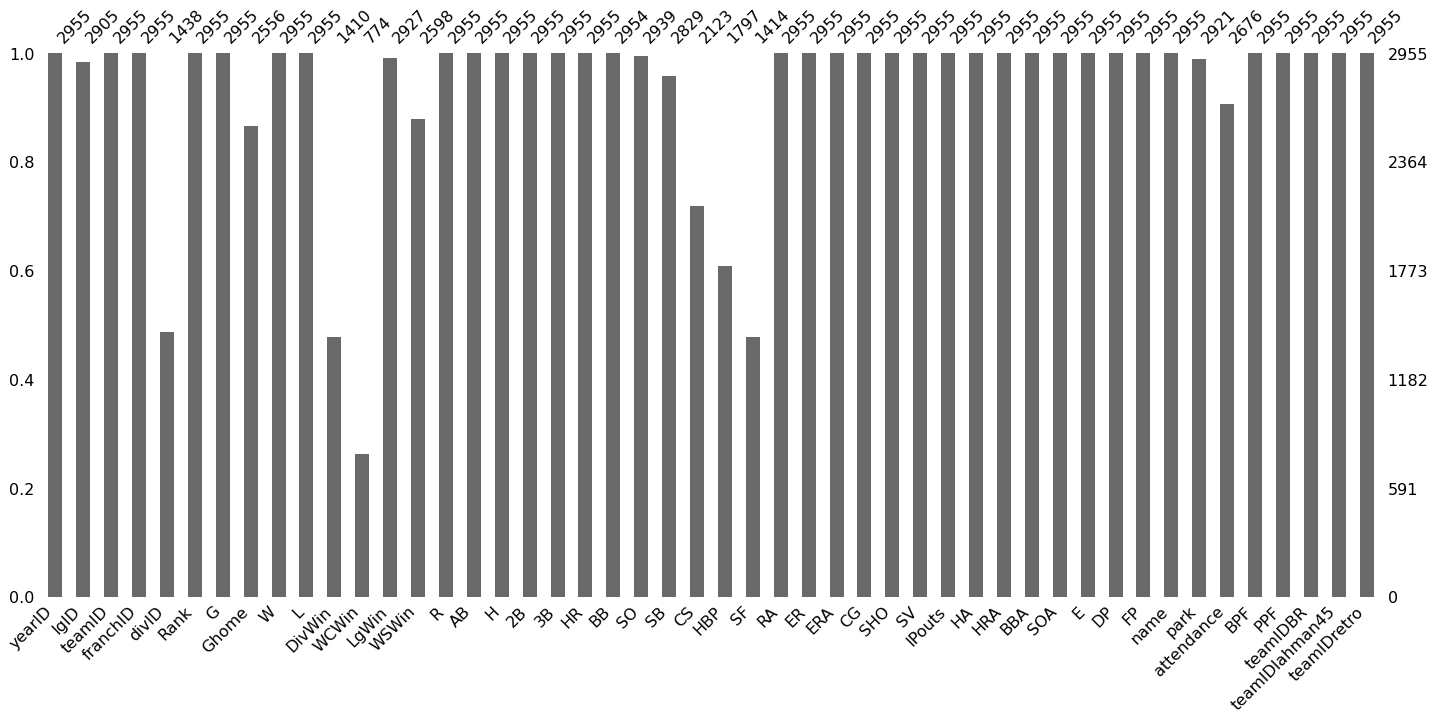

In [6]:
msno.bar(team_data)

As you can see, some columns (particularly WCWin, SF, DivWin, and divID) have enormous amounts of missing data. This can give us an incomplete analysis if we don't treat it properly. 

Let's see if there's any observable order to our missing data

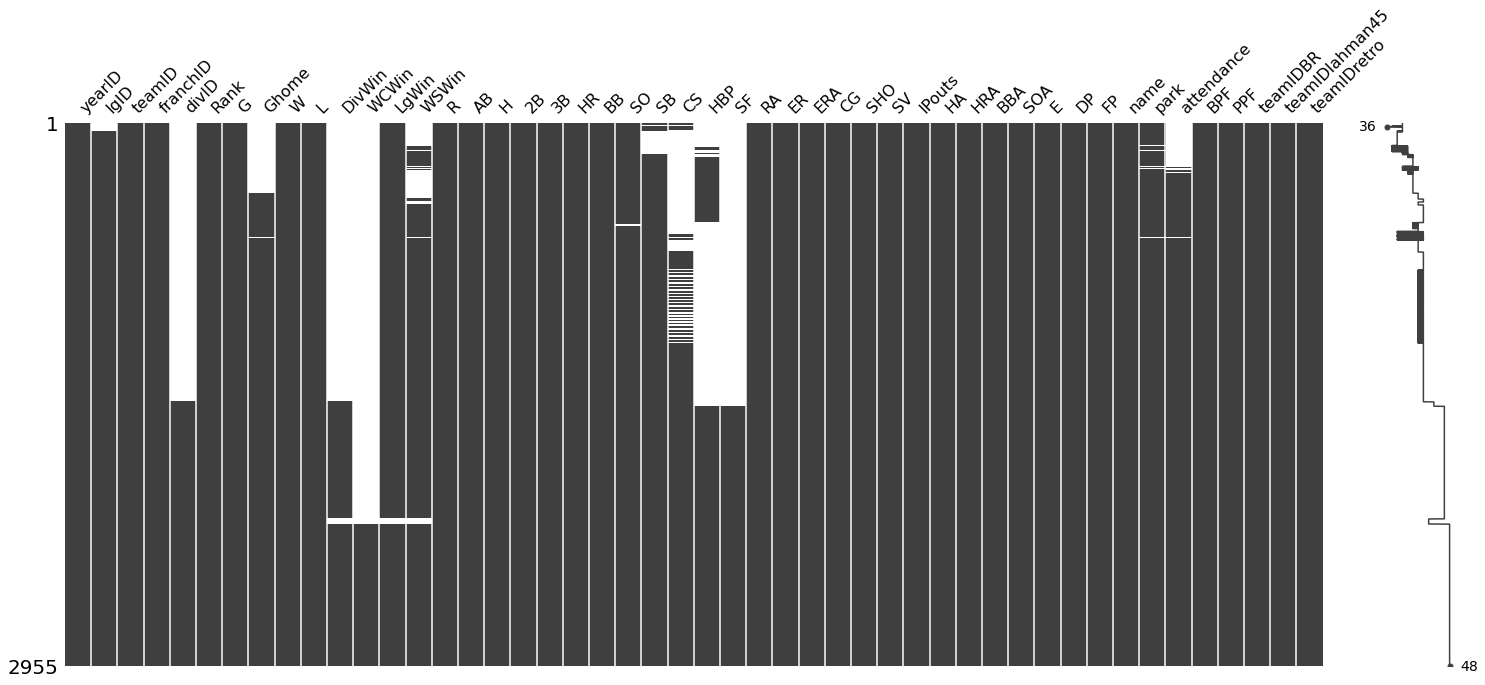

In [7]:
msno.matrix(team_data)

It looks like most of our missing data is coming in bunches. In fact, the backend of the dataset looks completely intact. Let's explore what might be causing this missing data.

A bit of researched revealed that much of this null data can be traced back to rule changes or changes in the construction of the league. For example, until 1903, there was no Major League Baseball. There were 2 independant baseball leagues, the National League and the American Association. In 1903 they merged to form the MLB and continued to play in separate leagues within the MLB. Thus, there is no _lgID_ data before 1903 because there were no leagues. This also explains the null values in the _WSWin_ column because there was no World Series until the merger. Here's a breakdown of other league and rule changes that explain most of our missing data.

__Nulls__

- [1903](http://www.thebaseballcube.com/topics/attendance/) started tracking attendance
- [1903](https://en.wikipedia.org/wiki/Major_League_Baseball#League_organization) merger started leagues and world series
- [1954](https://www.mlb.com/glossary/standard-stats/sacrifice-fly#:~:text=Origin,fly%20should%20be%20counted%20statistically.) started tracking the sac fly as separate from the sac bunt
- [1969](https://lastwordonsports.com/baseball/2020/02/04/the-real-mlb-divisional-alignment/) divisions started
- [1994](https://en.wikipedia.org/wiki/1994%E2%80%9395_Major_League_Baseball_strike) the players staged a strike. Thus, there were no playoffs.
- [1994](https://en.wikipedia.org/wiki/Major_League_Baseball_wild_card#:~:text=The%20wild%20card%20was%20first,to%20face%20a%20division%20winner.) Added a wild card team

This research explains the vast majority of our missing data. I think the rest of it can be chalked up to poor record keeping in the early days of the sport. Regardless, we're going to limit our anlysis to data after the 1994 merger as that's considered the modern era. This will accomplish 2 things: 1. It will ensure we're only analyzing data that is relevant in today's game and 2. It will eliminate most of our null values.

In [8]:
data_since_1995 = team_data[team_data['yearID']>=1995]

data_since_1995.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2181,1995,NL,ATL,ATL,E,1,144,72.0,90,54,Y,N,Y,Y,645,4814,1202,210,27,168,520.0,933.0,73.0,43.0,40.0,34.0,540,494,3.44,18,11,34,3875,1184,107,436,1087,100,113,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,2561831.0,103,102,ATL,ATL,ATL
2182,1995,AL,BAL,BAL,E,3,144,72.0,71,73,N,N,N,N,704,4837,1267,229,27,173,574.0,803.0,92.0,45.0,39.0,41.0,640,607,4.31,19,10,29,3801,1165,149,523,930,72,141,0.986,Baltimore Orioles,Oriole Park at Camden Yards,3098475.0,102,101,BAL,BAL,BAL
2183,1995,AL,BOS,BOS,E,1,144,72.0,86,58,Y,N,N,N,791,4997,1399,286,31,175,560.0,923.0,99.0,44.0,65.0,49.0,698,631,4.39,7,9,39,3878,1338,127,476,888,120,151,0.978,Boston Red Sox,Fenway Park II,2164410.0,103,103,BOS,BOS,BOS
2184,1995,AL,CAL,ANA,W,2,145,72.0,78,67,N,N,N,N,801,5019,1390,252,25,186,564.0,889.0,58.0,39.0,36.0,38.0,697,645,4.52,8,9,42,3853,1310,163,486,901,95,120,0.982,California Angels,Anaheim Stadium,1748680.0,99,99,CAL,CAL,CAL
2185,1995,AL,CHA,CHW,C,3,145,72.0,68,76,N,N,N,N,755,5060,1417,252,37,146,576.0,767.0,110.0,39.0,32.0,56.0,758,693,4.85,12,4,36,3854,1374,164,617,892,108,131,0.980,Chicago White Sox,Comiskey Park II,1609773.0,96,95,CHW,CHA,CHA


In [9]:
data_since_1995.shape

(774, 48)

We've cut our data set down from 2,955 to 774, but I think it's a necessary step due to the fact that the data before 1995 is useless due to the 2 factors mentioned above. Now, let's take a look at the key attributes of our trimmed data set.

In [25]:
data_since_1995.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.00000,7.740000e+02,774.000000,774.000000
mean,2007.589147,2.996124,157.354005,78.658915,78.662791,78.662791,729.614987,5385.016796,1405.374677,278.490956,28.979328,168.808786,516.350129,1113.626615,93.377261,38.024548,54.657623,43.198966,729.614987,670.478036,4.305362,5.399225,8.640827,39.603359,4211.532300,1405.374677,168.808786,516.350129,1113.626615,100.414729,144.174419,0.98297,2.295003e+06,100.165375,100.165375
std,7.464565,1.440941,19.874412,9.953186,15.186763,15.156492,124.136548,699.972722,204.989393,46.498945,9.604715,40.732073,95.239034,198.951459,33.866908,13.234991,15.182131,10.632601,128.138273,118.443010,0.556340,4.168141,4.177211,8.793390,544.227583,208.872533,34.016808,91.280187,198.705178,21.581875,26.638965,0.00284,8.390730e+05,5.341244,5.304058
min,1995.000000,1.000000,58.000000,24.000000,19.000000,17.000000,219.000000,1752.000000,390.000000,73.000000,3.000000,51.000000,147.000000,440.000000,14.000000,3.000000,10.000000,7.000000,209.000000,181.000000,2.940000,0.000000,0.000000,6.000000,1419.000000,376.000000,62.000000,145.000000,393.000000,20.000000,33.000000,0.97400,0.000000e+00,88.000000,88.000000
25%,2001.000000,2.000000,162.000000,81.000000,70.250000,71.000000,678.500000,5477.000000,1370.000000,265.000000,23.000000,142.000000,471.000000,1009.250000,69.000000,30.000000,44.000000,37.000000,673.000000,616.000000,3.900000,2.000000,6.000000,35.000000,4302.000000,1366.000000,151.000000,476.000000,1003.250000,89.000000,134.000000,0.98100,1.756039e+06,97.000000,97.000000
50%,2008.000000,3.000000,162.000000,81.000000,80.000000,79.000000,739.500000,5535.000000,1435.000000,284.000000,29.000000,167.000000,523.000000,1107.500000,91.000000,37.000000,54.000000,43.000000,737.500000,678.000000,4.275000,5.000000,9.000000,40.000000,4329.500000,1439.000000,169.000000,523.500000,1115.000000,101.000000,146.000000,0.98300,2.317091e+06,100.000000,100.000000
75%,2014.000000,4.000000,162.000000,81.000000,89.000000,89.000000,801.000000,5595.000000,1499.000000,303.000000,35.000000,198.000000,572.000000,1233.000000,116.000000,46.000000,64.000000,50.000000,811.750000,744.750000,4.690000,7.000000,11.000000,45.000000,4360.000000,1505.000000,190.000000,573.000000,1232.000000,113.000000,159.000000,0.98500,2.924304e+06,103.000000,103.000000
max,2020.000000,6.000000,163.000000,84.000000,116.000000,119.000000,1009.000000,5781.000000,1684.000000,376.000000,61.000000,307.000000,775.000000,1595.000000,201.000000,85.000000,103.000000,75.000000,1103.000000,1015.000000,6.380000,27.000000,23.000000,66.000000,4485.000000,1734.000000,305.000000,784.000000,1687.000000,160.000000,204.000000,0.99100,4.298655e+06,129.000000,129.000000


A quick glance at our value count indicates that we've eliminated all our null values by trimming our data set. Let's confirm that

In [10]:
data_since_1995.isnull().sum()

yearID            0
lgID              0
teamID            0
franchID          0
divID             0
Rank              0
G                 0
Ghome             0
W                 0
L                 0
DivWin            0
WCWin             0
LgWin             0
WSWin             0
R                 0
AB                0
H                 0
2B                0
3B                0
HR                0
BB                0
SO                0
SB                0
CS                0
HBP               0
SF                0
RA                0
ER                0
ERA               0
CG                0
SHO               0
SV                0
IPouts            0
HA                0
HRA               0
BBA               0
SOA               0
E                 0
DP                0
FP                0
name              0
park              0
attendance        0
BPF               0
PPF               0
teamIDBR          0
teamIDlahman45    0
teamIDretro       0
dtype: int64

Yes. It appears as though we've successfully eliminated all our null values and now have a completely clean data set to work with.

## Data Types

Let's check our data types to see if anything is stored incorrectly

In [11]:
data_since_1995.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                float64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

It looks like all our data is stored properly. The numerical data is stored as ints or floats and the categorical data is stored as objects. Let's separate the two data types for future use.

In [26]:
numeric_data = data_since_1995.loc[:, data_since_1995.dtypes != np.object]
numeric_data.shape

(774, 35)

In [27]:
categorical_data = data_since_1995.loc[:, data_since_1995.dtypes == np.object]
categorical_data.shape

(774, 13)

It looks like we have 35 numerical features and 13 categorical ones. We'll use these data frames later in our analysis

## Outliers

Now, let's test for outliers to see if we have any data that stands out from the rest of the pack and try to determine why.

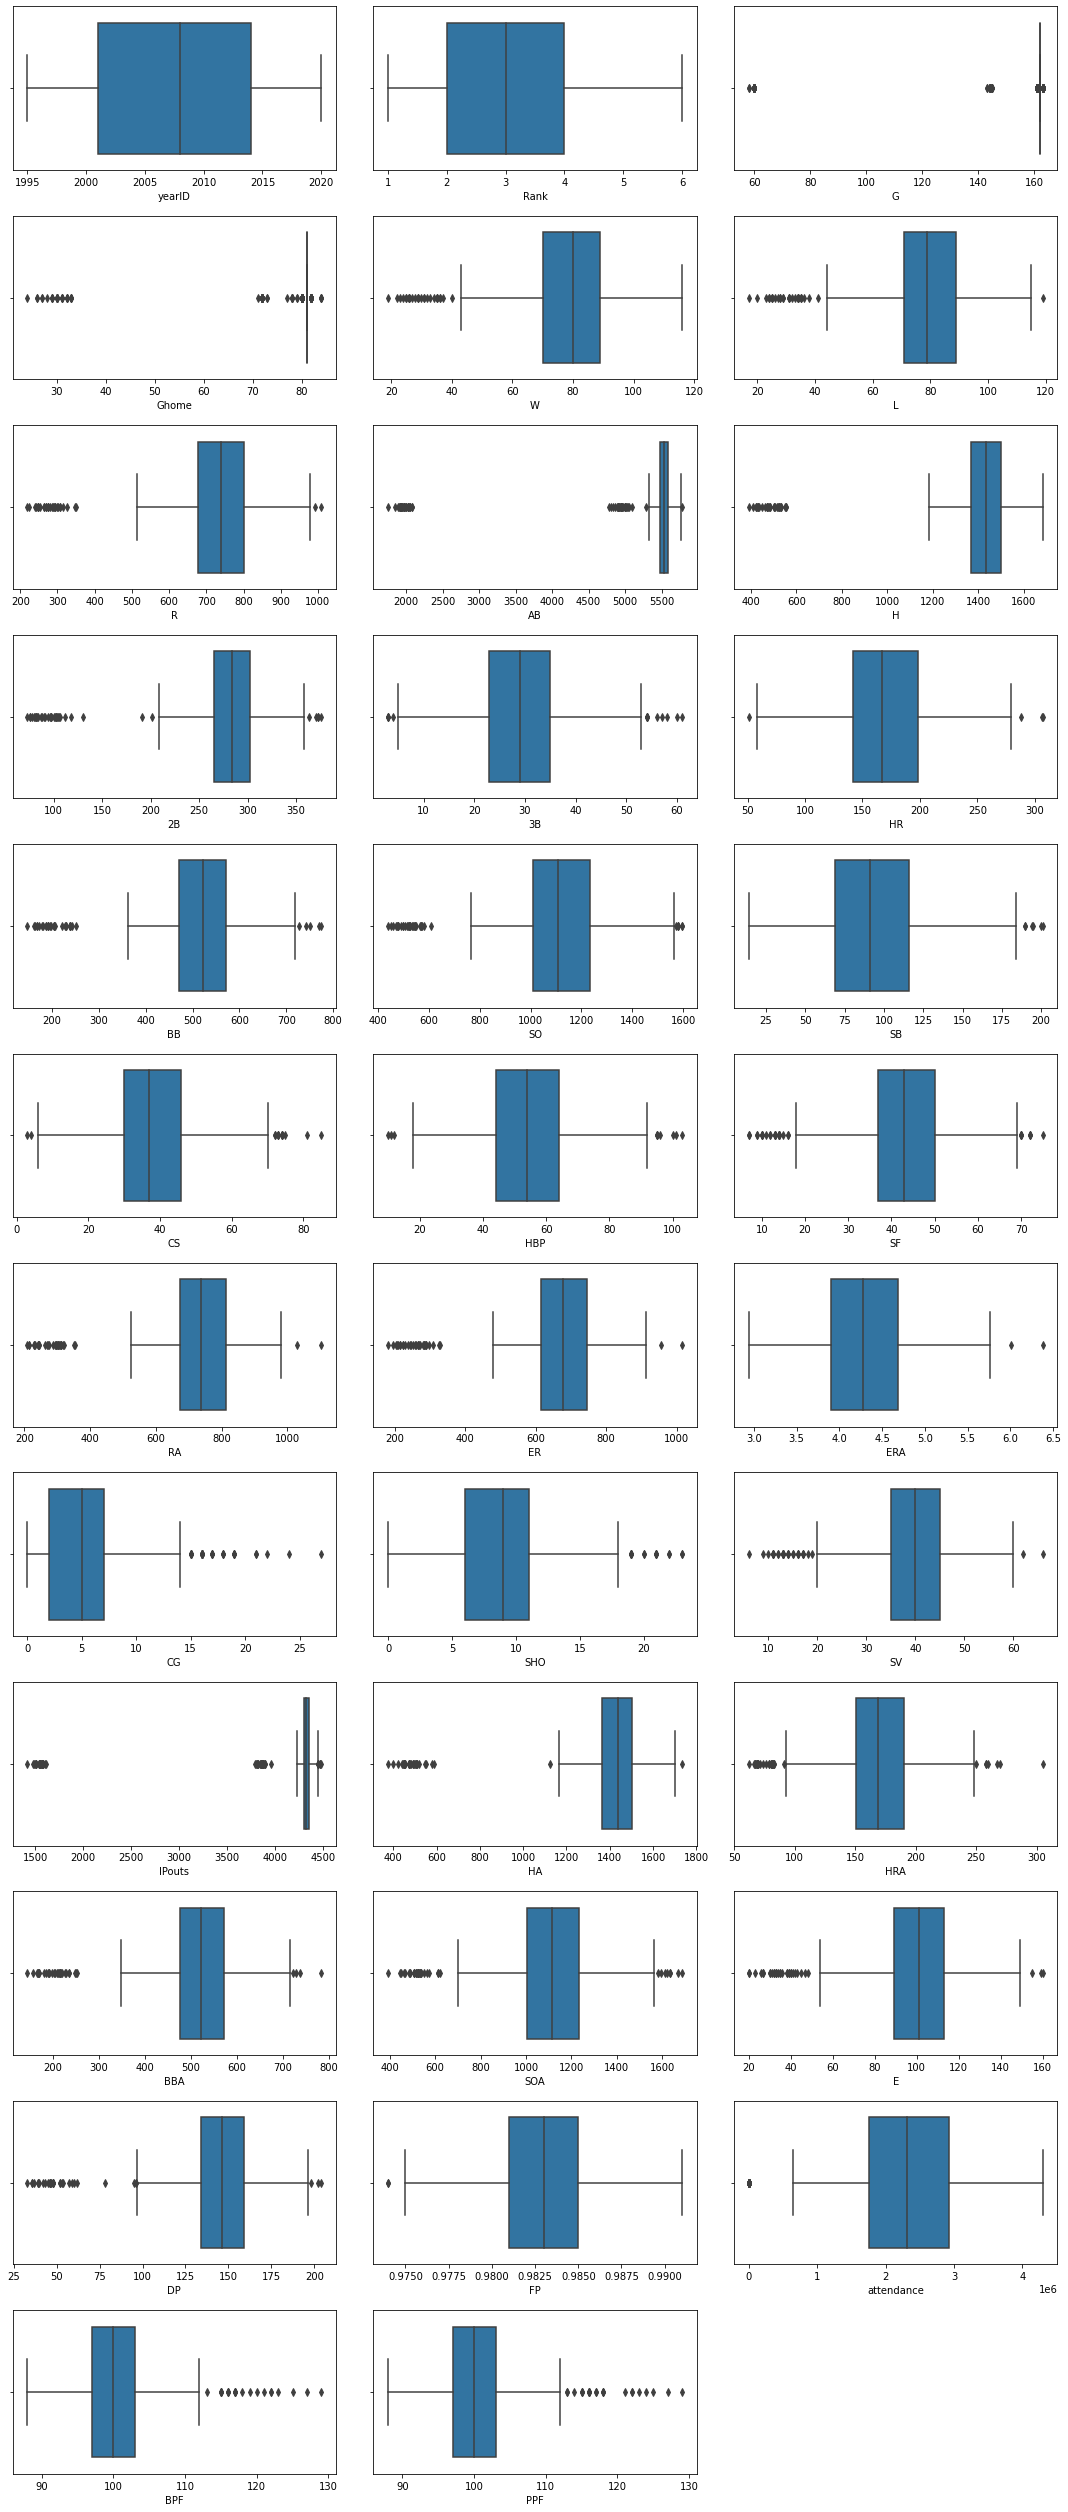

In [43]:
figure, axes = plt.subplots(12, 3, figsize=(15,35))

x = 0
y = 0
for col in numeric_data.columns:
  sns.boxplot(x=col, ax=axes[x, y], data=numeric_data)
  x = x + 1 if y ==2 else x
  y = y + 1 if y != 2 else 0

figure.tight_layout()
axes[11,2].set_axis_off()

plt.show()

In [28]:
Q1 = numeric_data.quantile(.25)
Q3 = numeric_data.quantile(.75)
IQR = Q3 - Q1

In [29]:
numeric_data_outliers = numeric_data[((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

numeric_data_outliers.head()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
2181,1995,1,144,72.0,90,54,645,4814,1202,210,27,168,520.0,933.0,73.0,43.0,40.0,34.0,540,494,3.44,18,11,34,3875,1184,107,436,1087,100,113,0.982,2561831.0,103,102
2182,1995,3,144,72.0,71,73,704,4837,1267,229,27,173,574.0,803.0,92.0,45.0,39.0,41.0,640,607,4.31,19,10,29,3801,1165,149,523,930,72,141,0.986,3098475.0,102,101
2183,1995,1,144,72.0,86,58,791,4997,1399,286,31,175,560.0,923.0,99.0,44.0,65.0,49.0,698,631,4.39,7,9,39,3878,1338,127,476,888,120,151,0.978,2164410.0,103,103
2184,1995,2,145,72.0,78,67,801,5019,1390,252,25,186,564.0,889.0,58.0,39.0,36.0,38.0,697,645,4.52,8,9,42,3853,1310,163,486,901,95,120,0.982,1748680.0,99,99
2185,1995,3,145,72.0,68,76,755,5060,1417,252,37,146,576.0,767.0,110.0,39.0,32.0,56.0,758,693,4.85,12,4,36,3854,1374,164,617,892,108,131,0.980,1609773.0,96,95


In [30]:
numeric_data_outliers.shape

(302, 35)

__Takeaways:__
- Based on our boxplots, it looks like we have an abnormal amount of outliers on the low end of our data.
- It looks like 302 of our 774 observations have at least 1 value that's is more than $1.5 * IQR$ away from the fringes of our data.
- There are numerous outliers in the _G_ (games played) column. Let's take a closer look at that.

- The [1995](https://en.wikipedia.org/wiki/1994%E2%80%9395_Major_League_Baseball_strike#:~:text=On%20March%2026%2C%20the%20MLB,the%20use%20of%20replacement%20players.) season was shortened from 162 games to 144 due the players strike.
- The [2020](https://en.wikipedia.org/wiki/2020_Major_League_Baseball_season) season was shortened from 162 games to 60 due to the COVID-19 pandemic.

This could go a long way towards explaining many of our outliers. Let's see a breakdown of our outlier data by year

In [33]:
numeric_data_outliers['yearID'].value_counts()

2020    30
1995    28
1999    17
2002    16
1996    16
1997    16
1998    16
2019    15
2004    14
2001    13
2008    12
2003    12
2018    11
2000    11
2016     9
2015     9
2013     8
2011     8
2006     6
2017     6
2010     6
2014     6
2009     5
2007     5
2005     4
2012     3
Name: yearID, dtype: int64

As you could see, the 2020 season occupies 30 rows in our outlier data set and the 1995 season occupies 28. This equates to 58 of our 302 outlier rows. Also note that there are only 30 teams in the MLB today and there were 28 in 1995, so 30/30 teams from 2020 and 28/28 teams from 1995 appear in our outlier data set. Let's remove those years from our data set so we're only dealing with data from full season.

In [34]:
data_2020_1995 = data_since_1995[(data_since_1995['yearID'] == 2020) | (data_since_1995['yearID'] == 1995)]

data_remove_outliers = data_since_1995.drop(data_2020_1995.index, axis=0)

data_remove_outliers.shape

(716, 48)

We've now trimmed our data set down to 716 observations. Let's take a look at our outliers again now that we've removed our shortened seasons

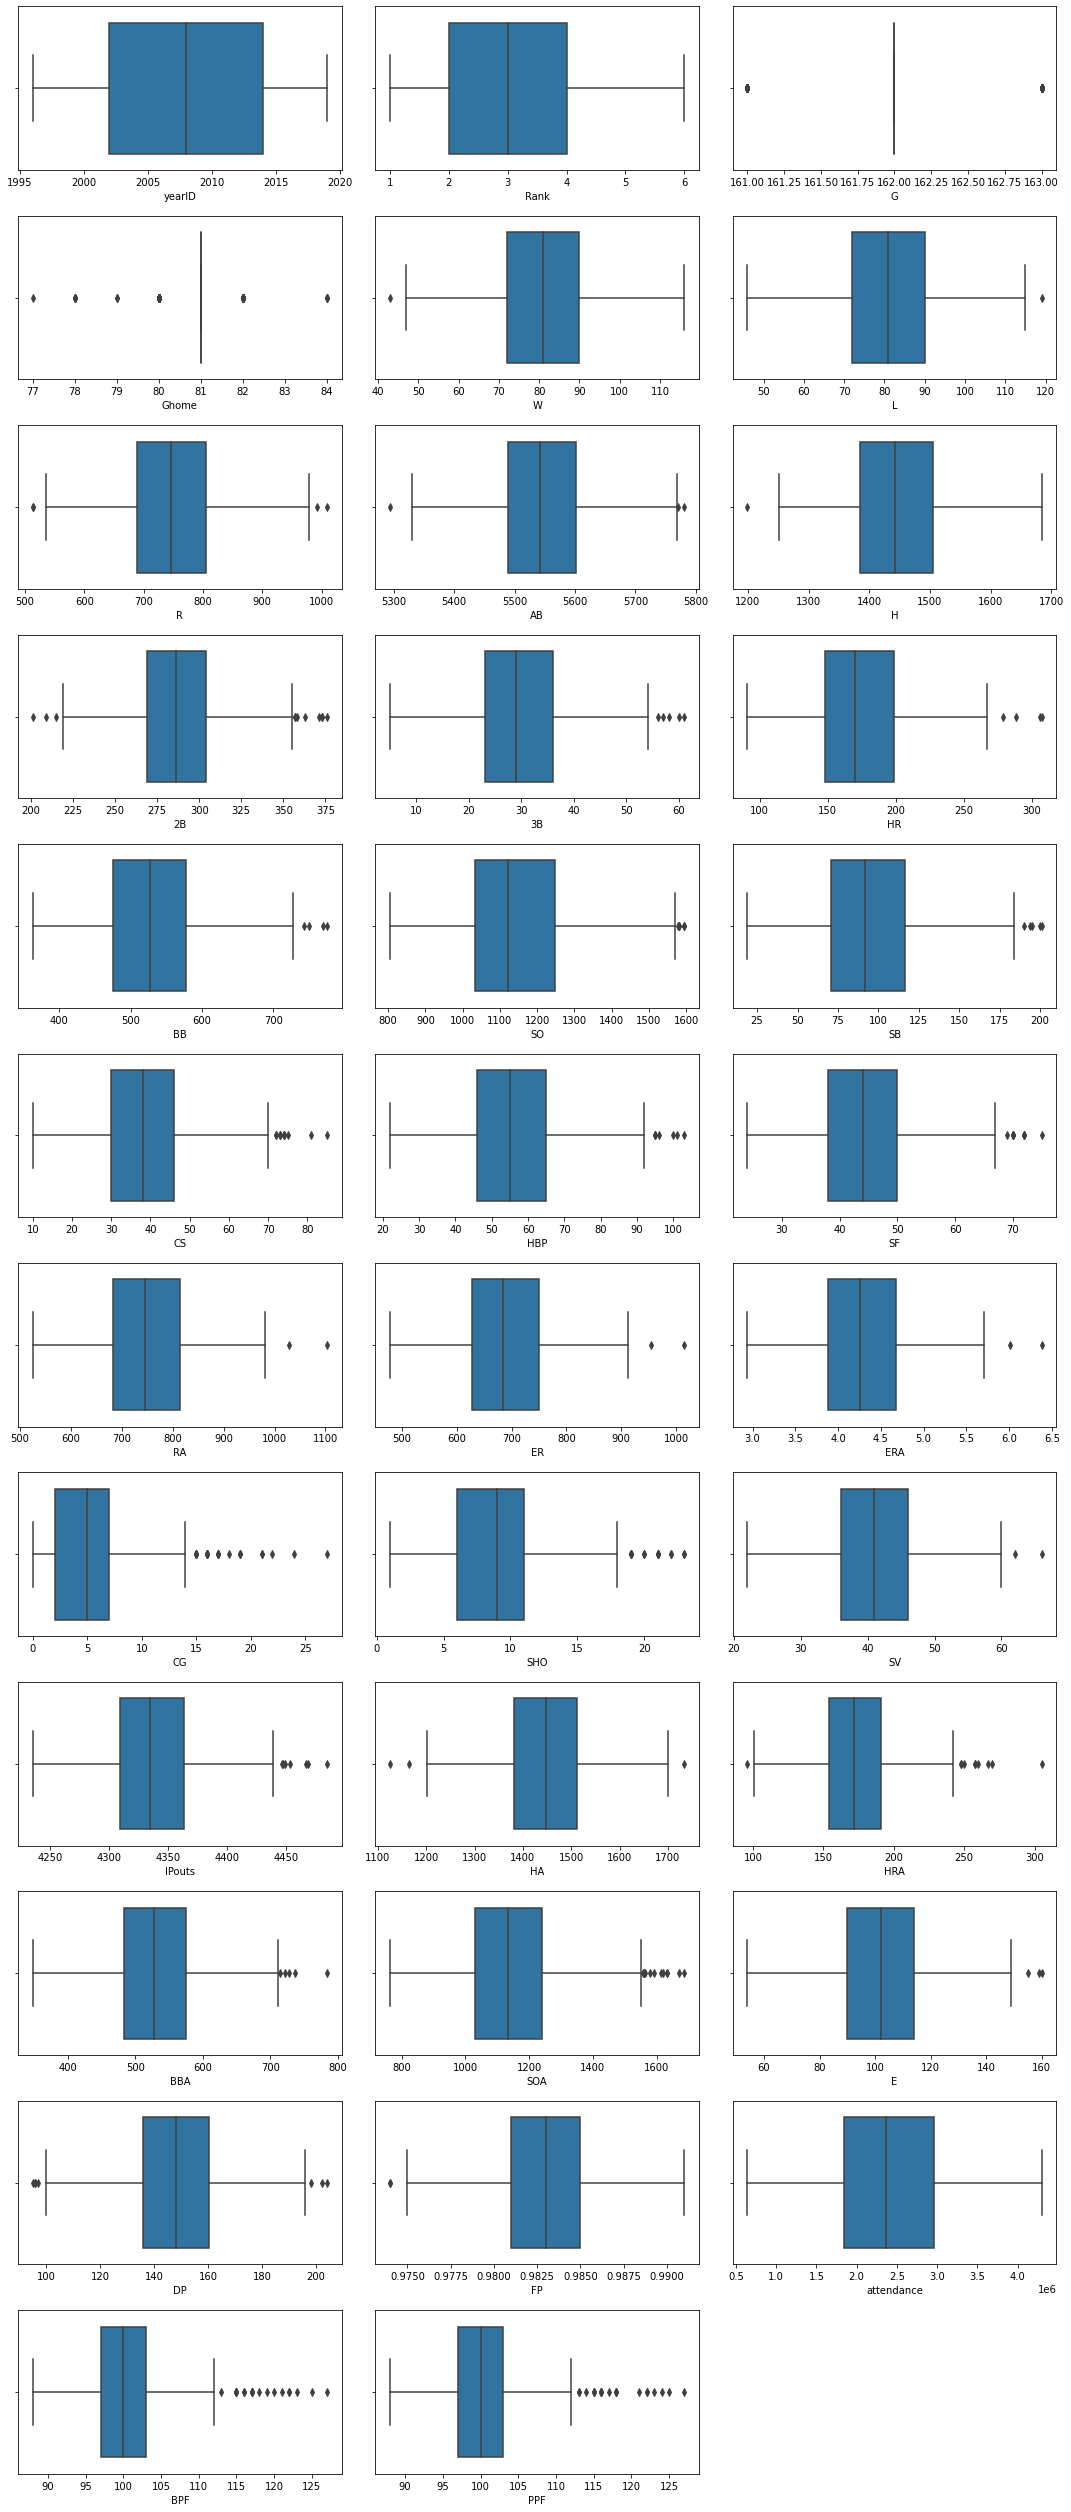

In [42]:
figure, axes = plt.subplots(12, 3, figsize=(15,35))

x = 0
y = 0
for col in numeric_data.columns:
  sns.boxplot(x=col, ax=axes[x, y], data=data_remove_outliers)
  x = x + 1 if y ==2 else x
  y = y + 1 if y != 2 else 0

figure.tight_layout()
axes[11,2].set_axis_off()

plt.show()

Our outliers are now looking much more sparse and manageable. Let's look at all our features that contain outliers and see if we can make sense of them.

In [36]:
outliers = pd.DataFrame(columns=['feature', 'min', 'max', 'size'])

for column in numeric_data.columns:
  value = data_remove_outliers[((data_remove_outliers[[column]] < (Q1 - 1.5 * IQR)) | (data_remove_outliers[[column]] > (Q3 + 1.5 * IQR))).any(axis=1)]
  if value.shape[0] > 0:
    data = {'feature': column, 'min': data_remove_outliers[column].min(), 'max': data_remove_outliers[column].max(), 'size': value.shape[0]}
    outliers = outliers.append(data, ignore_index = True)

outliers.sort_values(by=['size'], inplace=True, ascending=False)

outliers

,feature,min,max,size
0,G,161,163,86
1,Ghome,77,84,82
17,CG,0,27,25
29,PPF,88,127,22
28,BPF,88,127,20
18,SHO,1,23,15
11,CS,10,85,12
6,3B,5,61,9
13,SF,24,75,8
24,SOA,764,1687,8


### Games Played

The standard MLB season is 162 games, so why do we have rows showing 161 or 163 games? Let's answer the 161 games first.

It will occasionally happen that a team's game gets rained out late in the season. As the season goes on and they haven't found a make-up date for the game, it starts to become evident that the game will not have an impact on the final standings as neither team can improve or impair their playoff positioning. In such a case, MLB will simply cancel the game and allow both teams to finsish the season with 161 games played.

[Example](foxsports.com/stories/mlb/tigers-white-sox-rained-out-will-play-161-games-this-year)

As for the 163 games, when two teams are tied at the end of a season with playoff positioning on the line they'll play a tie-breaker [game 163](https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_tie-breakers) to determine the higher seed.

It appears as though all of our _G_ outliers fit into one of these 2 categories so we'll keep them as is.

### Home Games

Generally each MLB will play 81 games in their home ballpark (half of 162). Based on the breakdown above, it stands to reason that you'll have teams with 80 or 82 games played at home. So why do we teams with 77 and 84 home games?

In extenuating circumstances, MLB will relocate games to be played at the "away" teams stadium. For example, in [2015](https://www.tampabay.com/sports/baseball/rays/rays-orioles-series-moved-to-trop-because-of-violent-protests/2227424/), the Baltimore Orioles were scheduled to play a home game against the Tampa Bay Rays. However, violent riots errupted in the area of the stadium in the days leading up to the series. This prompted MLB to relocate the entire 3-game series to Tampa Bay for player and fan safety. Thus, the 2015 Orioles only played 78 home games while the Rays played 84.

Additionally, there are occasions in which a game will get postponed towards the end of the season and the only opportunity to make up the game is at the "away" team's home ballpark. This could also exlain some of these outliers.

### The rest

The rest of the outliers seem to abnormal, but not out of the realm of possibility. A brief look through the [MLB record book](https://www.baseball-almanac.com/rb_menu.shtml) shows that none of these outliers exceed the record or fail to reach the minimum in that particulur stat. Thus, we can assume that all these stats are legitimate and none of them were entered in error. Therefore, we'll keep the outliers as is.

# 3) Final EDA

Now that we've cleaned our data by eliminating our null and outlier values, we can look at the dataset we'll be using for our analysis.

In [39]:
data_remove_outliers.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.00000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.00000,716.000000,7.160000e+02,716.000000,716.000000
mean,2007.561453,3.005587,161.958101,80.959497,80.965084,80.965084,749.754190,5545.254190,1447.410615,287.389665,29.839385,173.565642,529.780726,1146.558659,95.610335,38.941341,56.236034,44.498603,749.754190,689.26257,4.293841,5.412011,9.039106,40.817039,4336.905028,1447.410615,173.565642,529.780726,1146.558659,103.034916,148.49581,0.983025,2.410423e+06,100.159218,100.159218
std,6.897075,1.445503,0.344270,0.504283,11.722438,11.684317,86.260078,78.376585,85.312779,27.682725,8.856788,36.773431,73.217566,158.033078,31.796738,12.171705,14.247616,8.911452,92.037912,85.15625,0.550702,4.047870,3.927829,7.240430,40.232950,94.616689,28.863700,67.279716,157.024939,17.463654,18.46876,0.002801,7.067496e+05,5.315481,5.268968
min,1996.000000,1.000000,161.000000,77.000000,43.000000,46.000000,513.000000,5294.000000,1199.000000,201.000000,5.000000,91.000000,363.000000,805.000000,19.000000,10.000000,22.000000,24.000000,525.000000,478.00000,2.940000,0.000000,1.000000,22.000000,4235.000000,1125.000000,96.000000,348.000000,764.000000,54.000000,95.00000,0.974000,6.427450e+05,88.000000,88.000000
25%,2002.000000,2.000000,162.000000,81.000000,72.000000,72.000000,689.000000,5489.000000,1385.000000,269.000000,23.000000,148.000000,475.000000,1034.250000,71.000000,30.000000,46.000000,38.000000,682.750000,627.00000,3.887500,2.000000,6.000000,36.000000,4309.000000,1381.000000,153.750000,482.750000,1030.750000,90.000000,136.00000,0.981000,1.842792e+06,97.000000,97.000000
50%,2008.000000,3.000000,162.000000,81.000000,81.000000,81.000000,746.000000,5542.000000,1443.000000,286.000000,29.000000,170.000000,527.000000,1122.000000,92.000000,38.000000,55.000000,44.000000,745.000000,684.50000,4.260000,5.000000,9.000000,41.000000,4335.000000,1447.000000,172.000000,527.000000,1132.500000,102.000000,148.00000,0.983000,2.367590e+06,100.000000,100.000000
75%,2014.000000,4.000000,162.000000,81.000000,90.000000,90.000000,805.000000,5601.250000,1505.250000,304.000000,36.000000,199.000000,578.000000,1249.000000,116.250000,46.000000,65.000000,50.000000,815.000000,749.00000,4.682500,7.000000,11.000000,46.000000,4363.250000,1511.250000,191.000000,575.000000,1240.250000,114.000000,160.25000,0.985000,2.958718e+06,103.000000,103.000000
max,2019.000000,6.000000,163.000000,84.000000,116.000000,119.000000,1009.000000,5781.000000,1684.000000,376.000000,61.000000,307.000000,775.000000,1595.000000,201.000000,85.000000,103.000000,75.000000,1103.000000,1015.00000,6.380000,27.000000,23.000000,66.000000,4485.000000,1734.000000,305.000000,784.000000,1687.000000,160.000000,204.00000,0.991000,4.298655e+06,127.000000,127.000000


In [40]:
data_remove_outliers.shape

(716, 48)

We're now down to 716 observations and 48 features over 24 seasons (1996-2019) of MLB play. 

## Numerical Distribution

Let's take a look at how our numerical data is distributed.

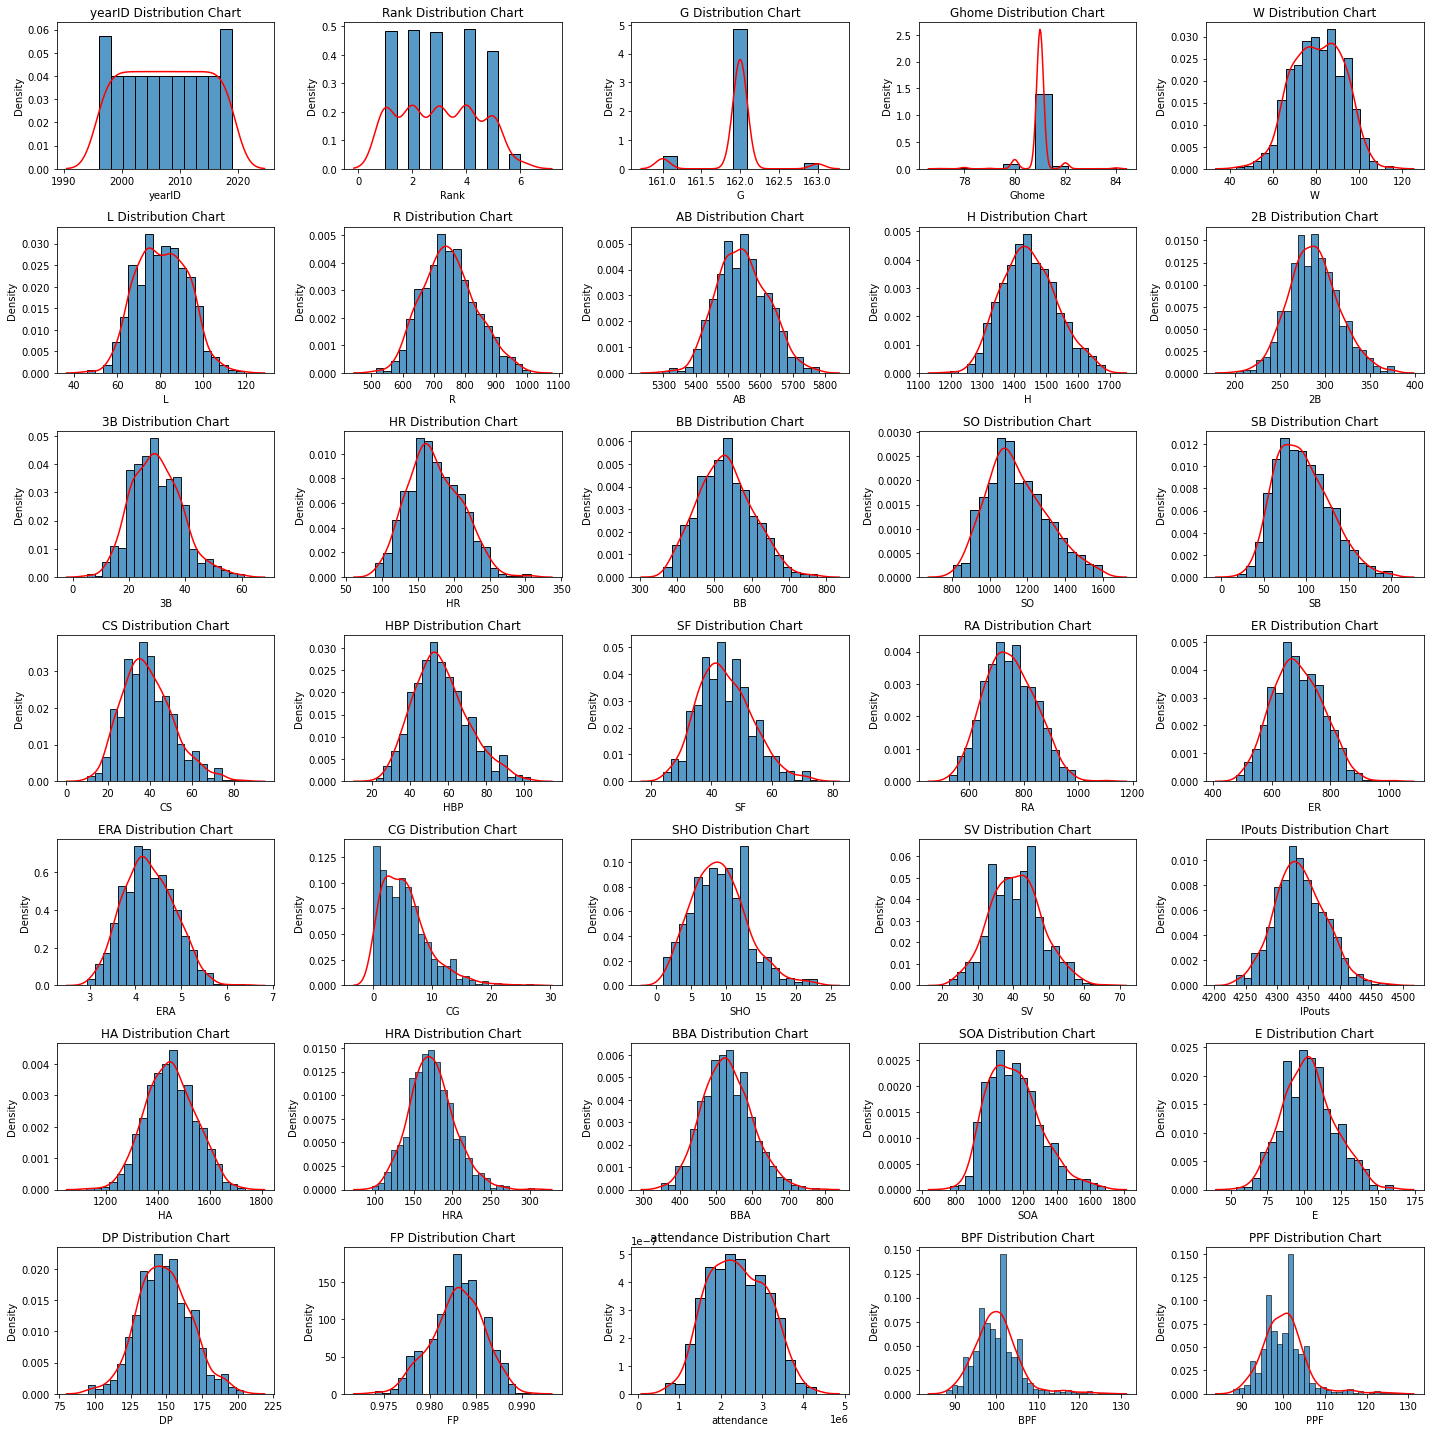

In [41]:
figure, axes = plt.subplots(7, 5, figsize=(20, 20))

x = 0
y = 0

for column in numeric_data.columns:
  sns.histplot(data_remove_outliers[column], ax=axes[x,y], stat='density')
  sns.kdeplot(data_remove_outliers[column], ax=axes[x,y], color='red', alpha=0.5)
  axes[x, y].set_title(column + " Distribution Chart")
  x = x + 1 if y == 4 else x
  y = y + 1 if y != 4 else 0

# set spacing
figure.tight_layout()

plt.show()


__Takeaways:__

- It looks like all our data is relatively normally distributed.
- CG and SHO is right-skewed which makes sense given the current mindset of the league as most teams aren't letting their starting pitchers finish games without help from the bullpen.

## Categorical Distribution

Now let's look at the distribution of our categorical features

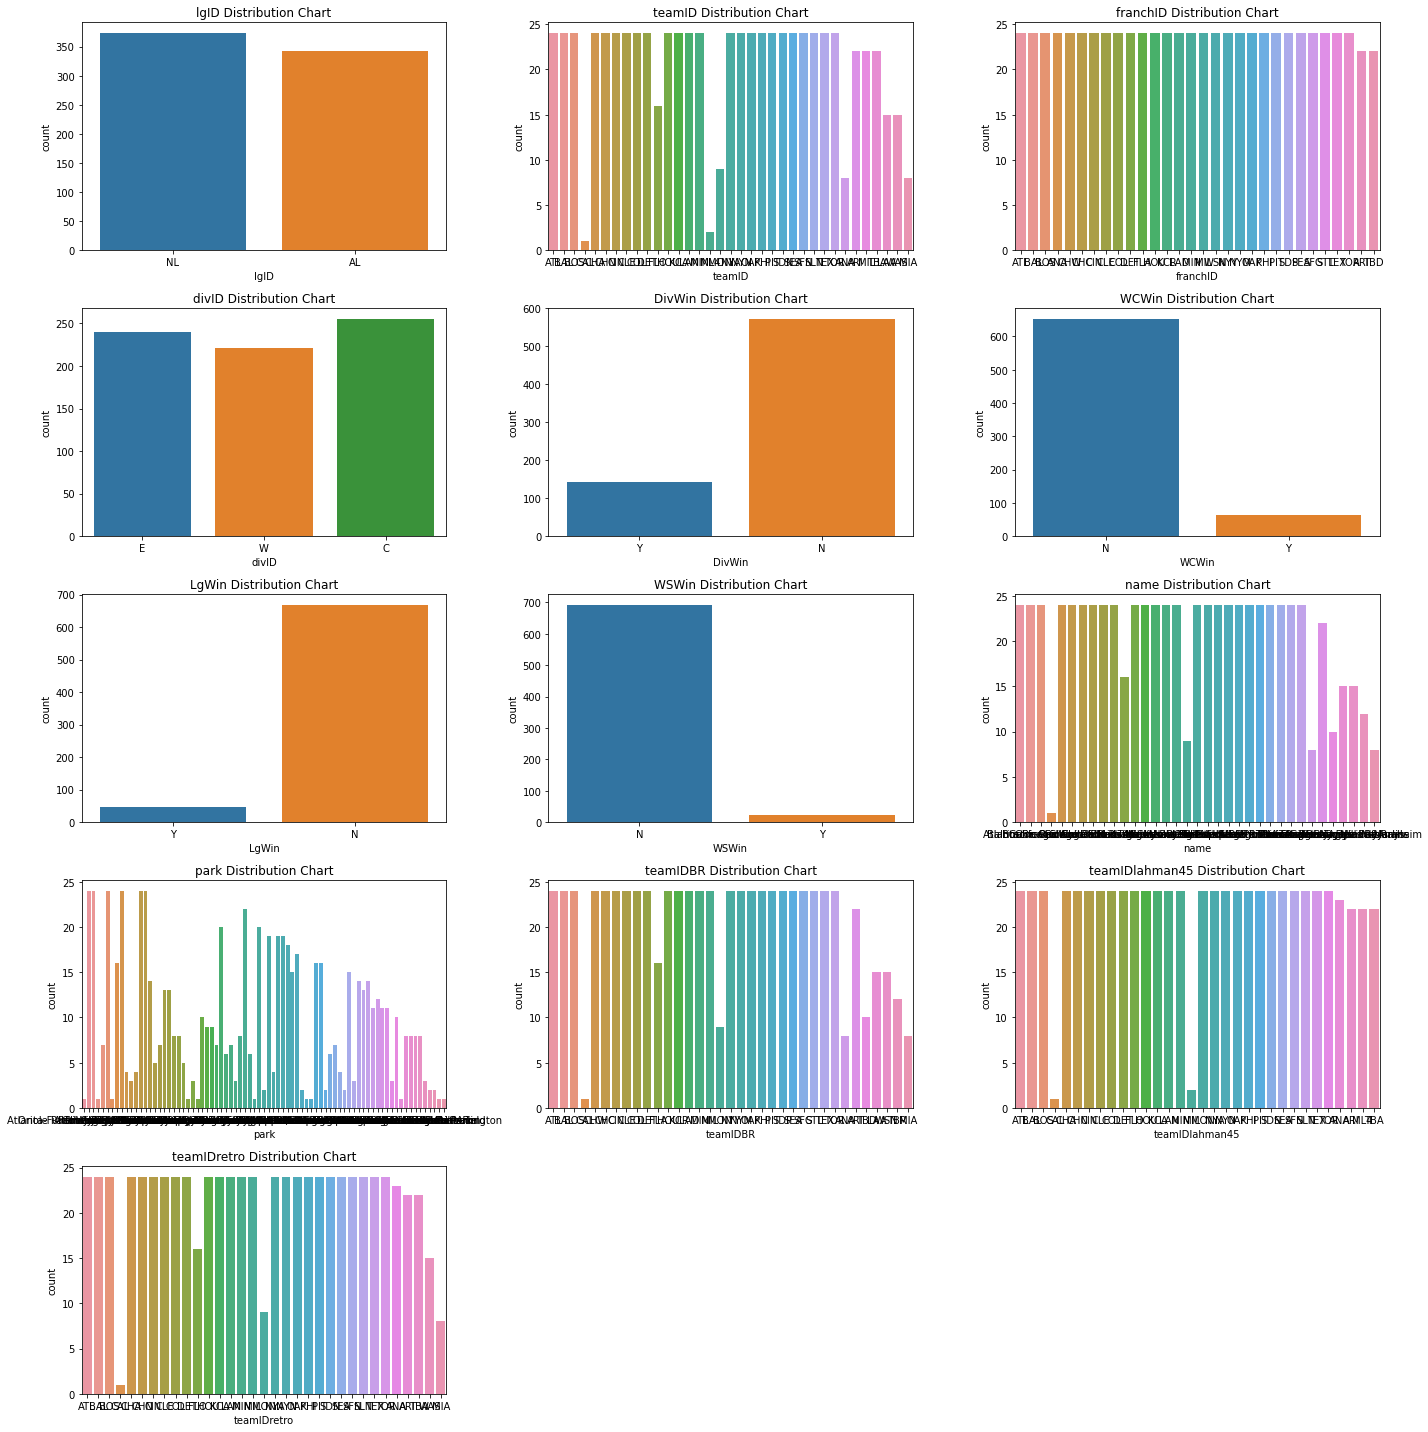

In [45]:
figure, axes = plt.subplots(5, 3, figsize=(20, 20))

x = 0
y = 0

for column in categorical_data.columns:
  sns.countplot(x=column, ax=axes[x,y], data=data_remove_outliers)
  axes[x, y].set_title(column + " Distribution Chart")
  x = x + 1 if y == 2 else x
  y = y + 1 if y != 2 else 0

# set spacing
figure.tight_layout()
axes[4, 1].set_axis_off()
axes[4,2].set_axis_off()

plt.show()

__Takeaways:__

- There are some interesting things to point out with team names and franchise IDs
  - In 1998 there was an expansion that increased the league size from 28 to 30. This is when the Tampa Bay Rays and Arizona Diamondbacks entered the league. This is reflected in the _franID_ graph.
  - There were also some teams that changed names or relocated over the course of the 24 years we're analyzing. The Florida Marlins became the Miami Marlins, the Tampa Bay Devil Rays became the Tampa Bay Rays, the Montreal Expos became the Washington Nationals, and the California Angels became the Anahaim Angels and then the Los Angeles Angels. All these changes are reflected in the _teamID_ and _name_ graphs.
- The _lgID_ is unbalanced because there were 16 teams in the NL and 14 in the AL until 2013 when the Astros move to the AL. This also explains the discrepency in the _divID_ graph as the Astros played in the NL Central before moving to the AL West
- The distributions for _WCWin_, _DivWin_, _LgWin_, and _WSWin_ all make sense too. Each column represents another step in the playoffs so it stands to reason that the 'Y' count will decrease with each additional round.


## Correlation

Let's now look at the correlations between our independant and dependant variables to get a sense of what statistics correlate strongly with Wins.

### Categorical Data

We'll start with our categorical data, using a bar chart to visualize each individual correlation

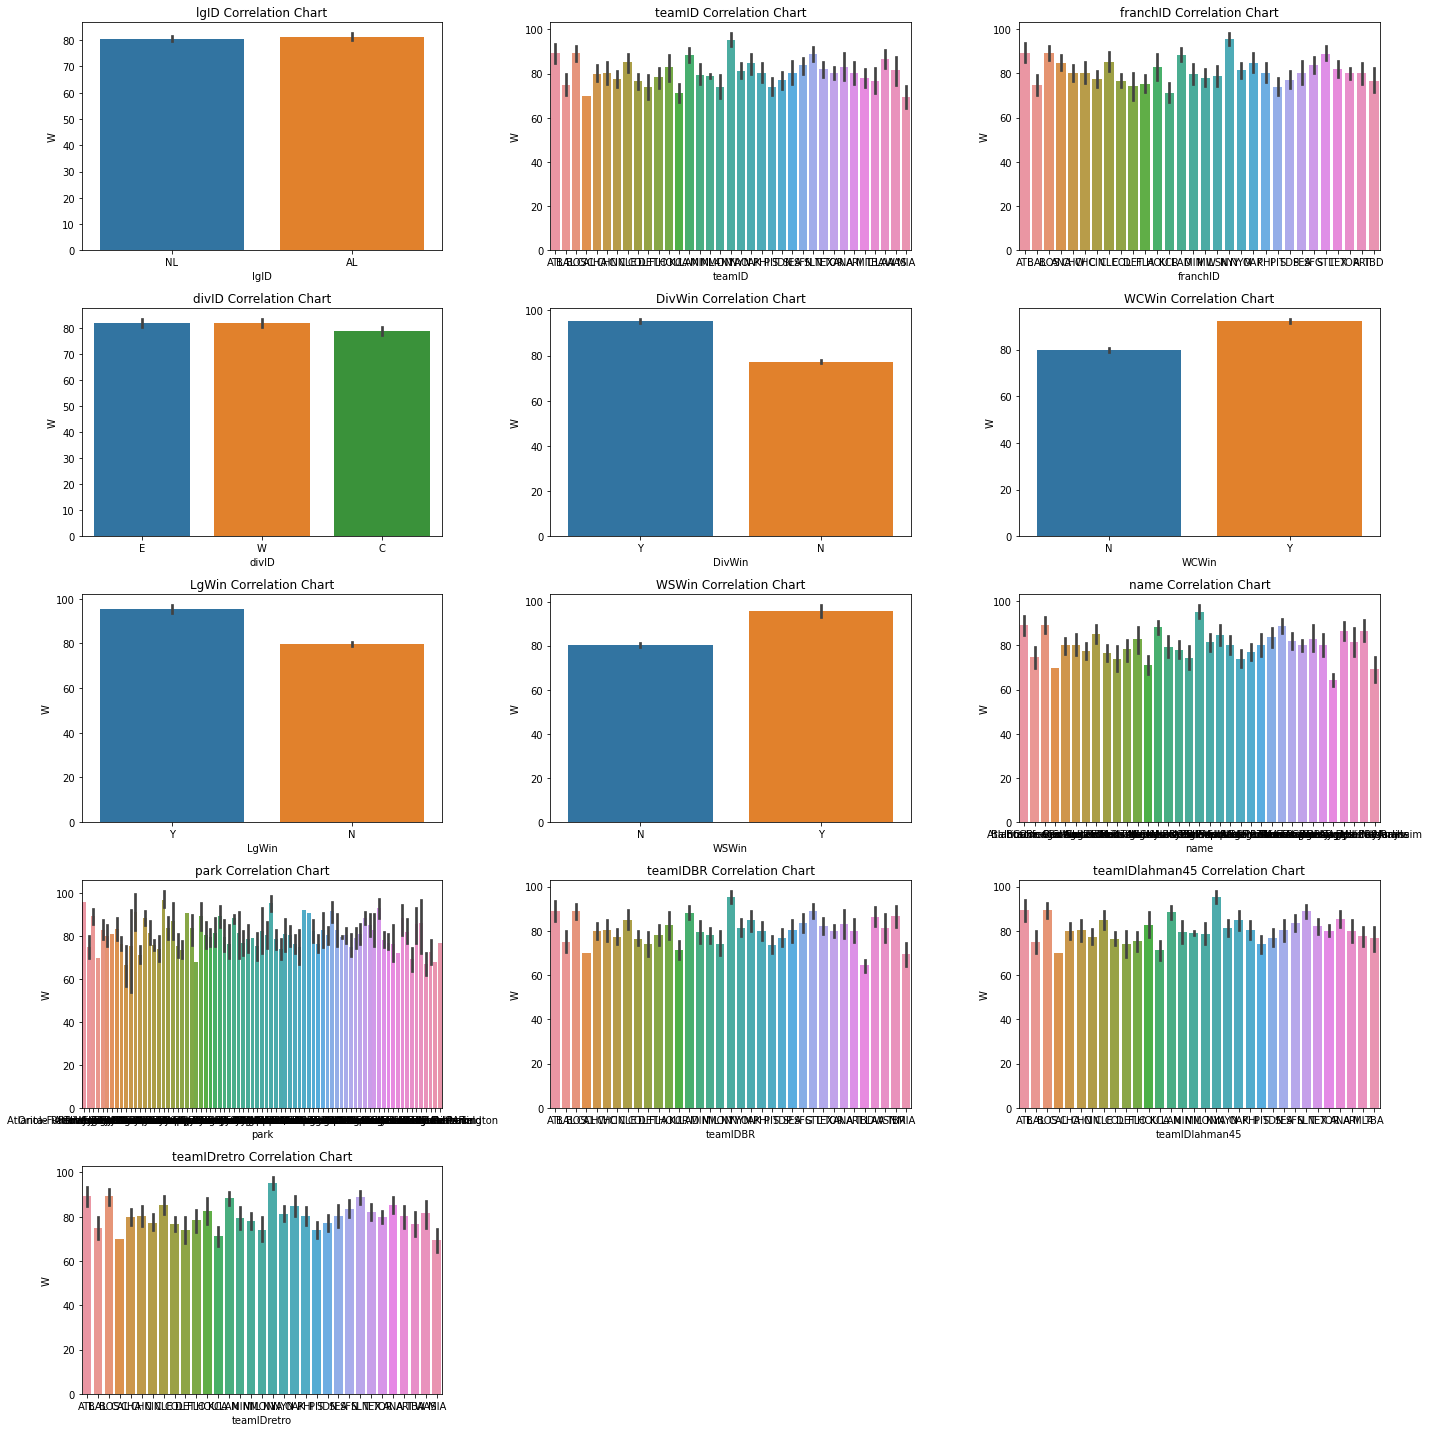

In [51]:
figure, axes = plt.subplots(5, 3, figsize=(20, 20))

x = 0
y = 0

for column in categorical_data.columns:
  sns.barplot(x=column, y='W', ax=axes[x,y], data=data_remove_outliers)
  axes[x, y].set_title(column + " Correlation Chart")
  x = x + 1 if y == 2 else x
  y = y + 1 if y != 2 else 0

# set spacing
figure.tight_layout()
axes[4,1].set_axis_off()
axes[4,2].set_axis_off()

plt.show()

__Takeaways:__

- There doesn't seem to be any significant correlations between Wins and any of our categorical features.
- It's surprising that playoff series wins (_WCWin_, _DivWin_, etc.) don't correlate more closely with Wins. You'd think that the teams making it far in the playoffs tend to be the ones that win a lot of games. It looks like there is a correlation, but not a particullarly strong one.
- I think we can safely remove _lgID_, _teamID_, _franchID_, _divID_, _name_, _park_, _teamIDBR_, _teamIDlaham45_, and _teamIDretro_ due to their lack of correlation

In [63]:
data_strong_corr = data_remove_outliers.drop(['lgID', 'teamID', 'franchID', 'divID', 'name', 'park', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'], axis=1)
data_strong_corr.head()

,yearID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
2209,1996,1,162,81.0,96,66,Y,N,Y,N,773,5614,1514,264,28,197,530.0,1032.0,83.0,43.0,27.0,50.0,648,575,3.52,14,9,46,4407,1372,120,451,1245,130,143,0.980,2901242.0,106,104
2210,1996,2,163,82.0,88,74,N,Y,N,N,949,5689,1557,299,29,257,645.0,915.0,76.0,40.0,61.0,67.0,903,839,5.14,13,1,44,4406,1604,209,597,1047,97,173,0.984,3646950.0,100,99
2211,1996,3,162,81.0,85,77,N,N,N,N,928,5756,1631,308,31,209,642.0,1020.0,91.0,44.0,67.0,47.0,921,807,4.98,17,5,37,4374,1606,185,722,1165,135,152,0.978,2315231.0,101,101
2212,1996,4,161,81.0,70,91,N,N,N,N,762,5686,1571,256,24,192,527.0,974.0,53.0,39.0,29.0,33.0,943,847,5.30,12,8,38,4317,1546,219,662,1052,128,156,0.979,1820521.0,98,98
2213,1996,2,162,81.0,85,77,N,N,N,N,898,5644,1586,284,33,195,701.0,927.0,105.0,41.0,34.0,62.0,794,733,4.52,7,4,43,4383,1529,174,616,1039,109,145,0.982,1676403.0,95,95


In [64]:

categorical_data = data_strong_corr.loc[:, data_strong_corr.dtypes == np.object]
categorical_data.shape

(716, 4)

### Numerical Data

Now let's look at the correlation of our numerical data and Wins. We'll do this using a regression plot and trying to spot steeper upward or downward slopes.

We're going to remove _w_, _L_, and _Rank_ from our analysis because they are all different ways of expressing wins so they're all going to be directly correlated.

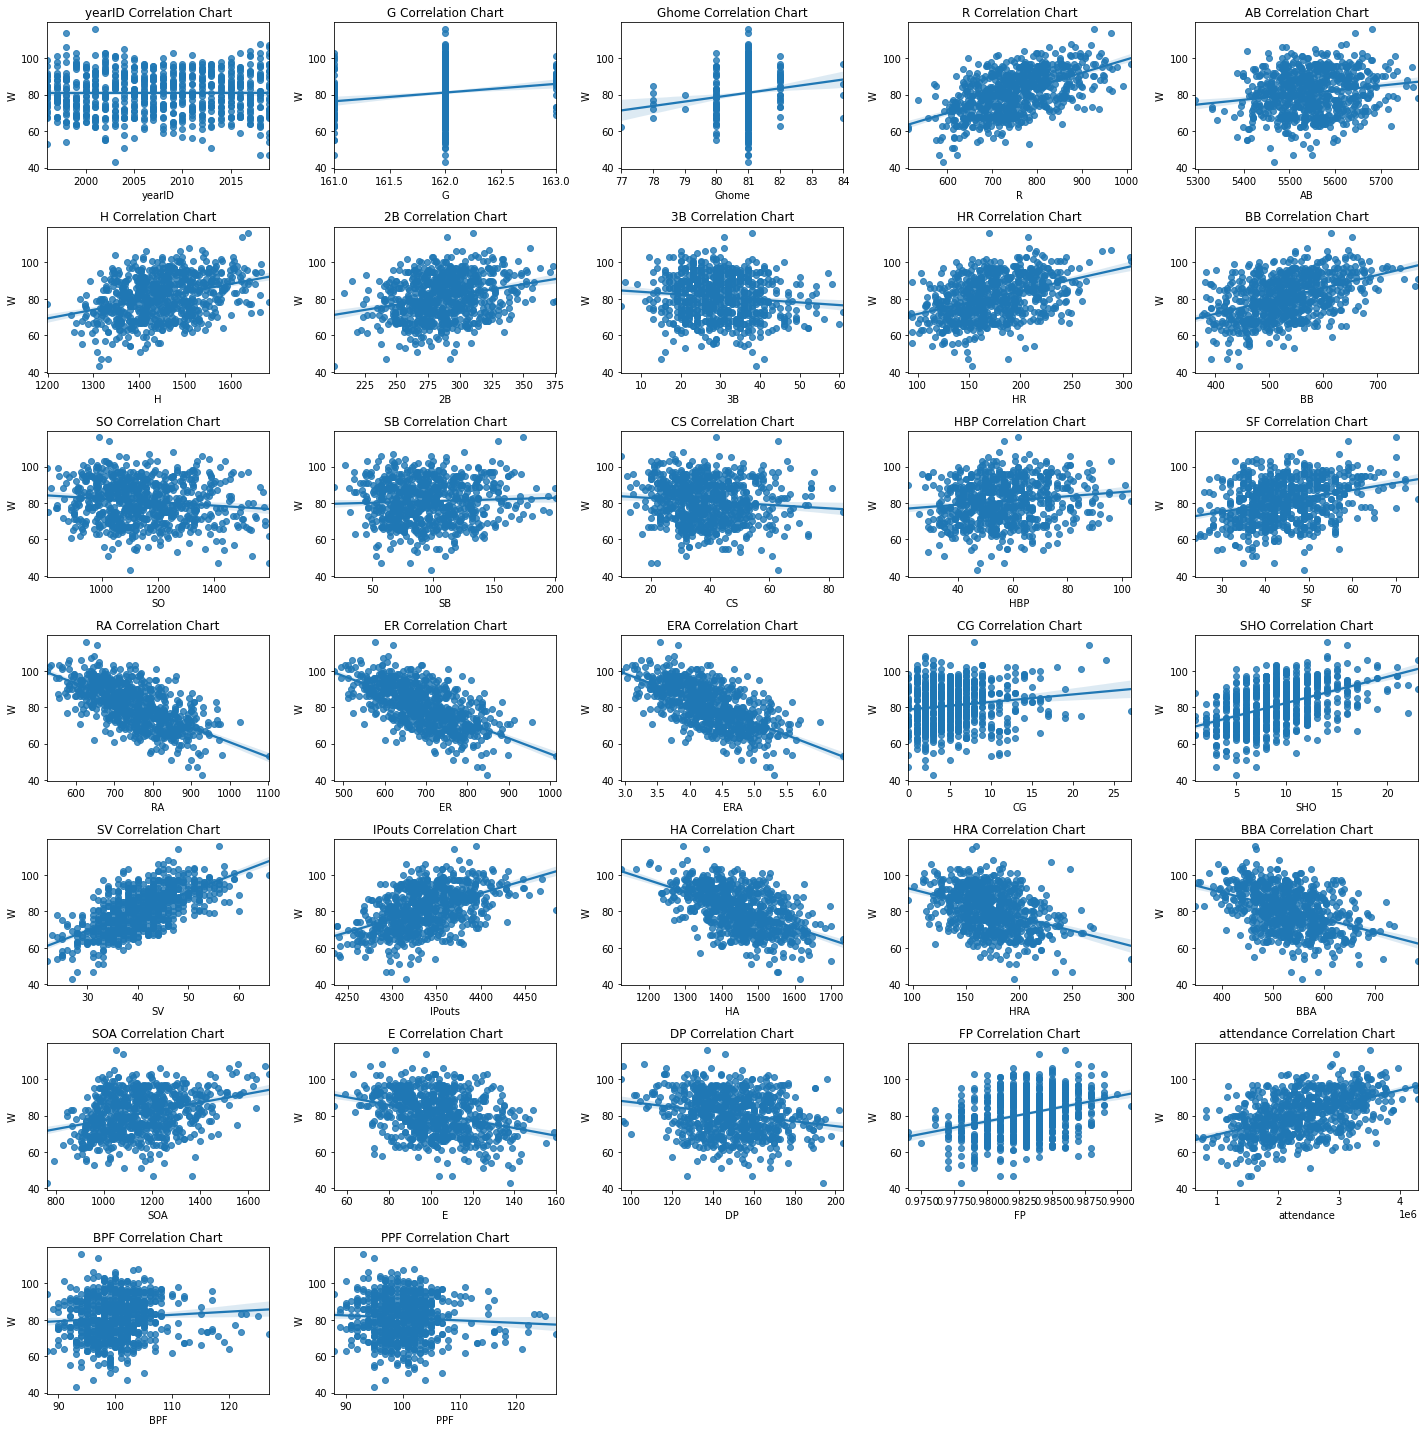

In [53]:
figure, axes = plt.subplots(7, 5, figsize=(20, 20))
unwanted = ['W', 'L', 'Rank']
numeric_columns = [x for x in numeric_data.columns if x not in unwanted]

x = 0
y = 0

for column in numeric_columns:
  sns.regplot(x=column, y='W', ax=axes[x,y], data=data_remove_outliers)
  axes[x, y].set_title(column + " Correlation Chart")
  x = x + 1 if y == 4 else x
  y = y + 1 if y != 4 else 0

# set spacing
figure.tight_layout()
axes[6, 2].set_axis_off()
axes[6, 3].set_axis_off()
axes[6, 4].set_axis_off()

plt.show()

__Takeaways:__

- It looks like pitching stats (_HA_, _HRA_, _ER_, _ERA_, etc.) have a much stronger correlation than the hitting stats (_R_, _H_, _HR_, etc.)
- _R_, _H_, and _HR_ still have a strong correlation
- We could probably already eliminate a few of these due to their weak correlation

### Correlation Matrix

Let's first take a look at the correlation matrix to see if we can spot any more strong correlations

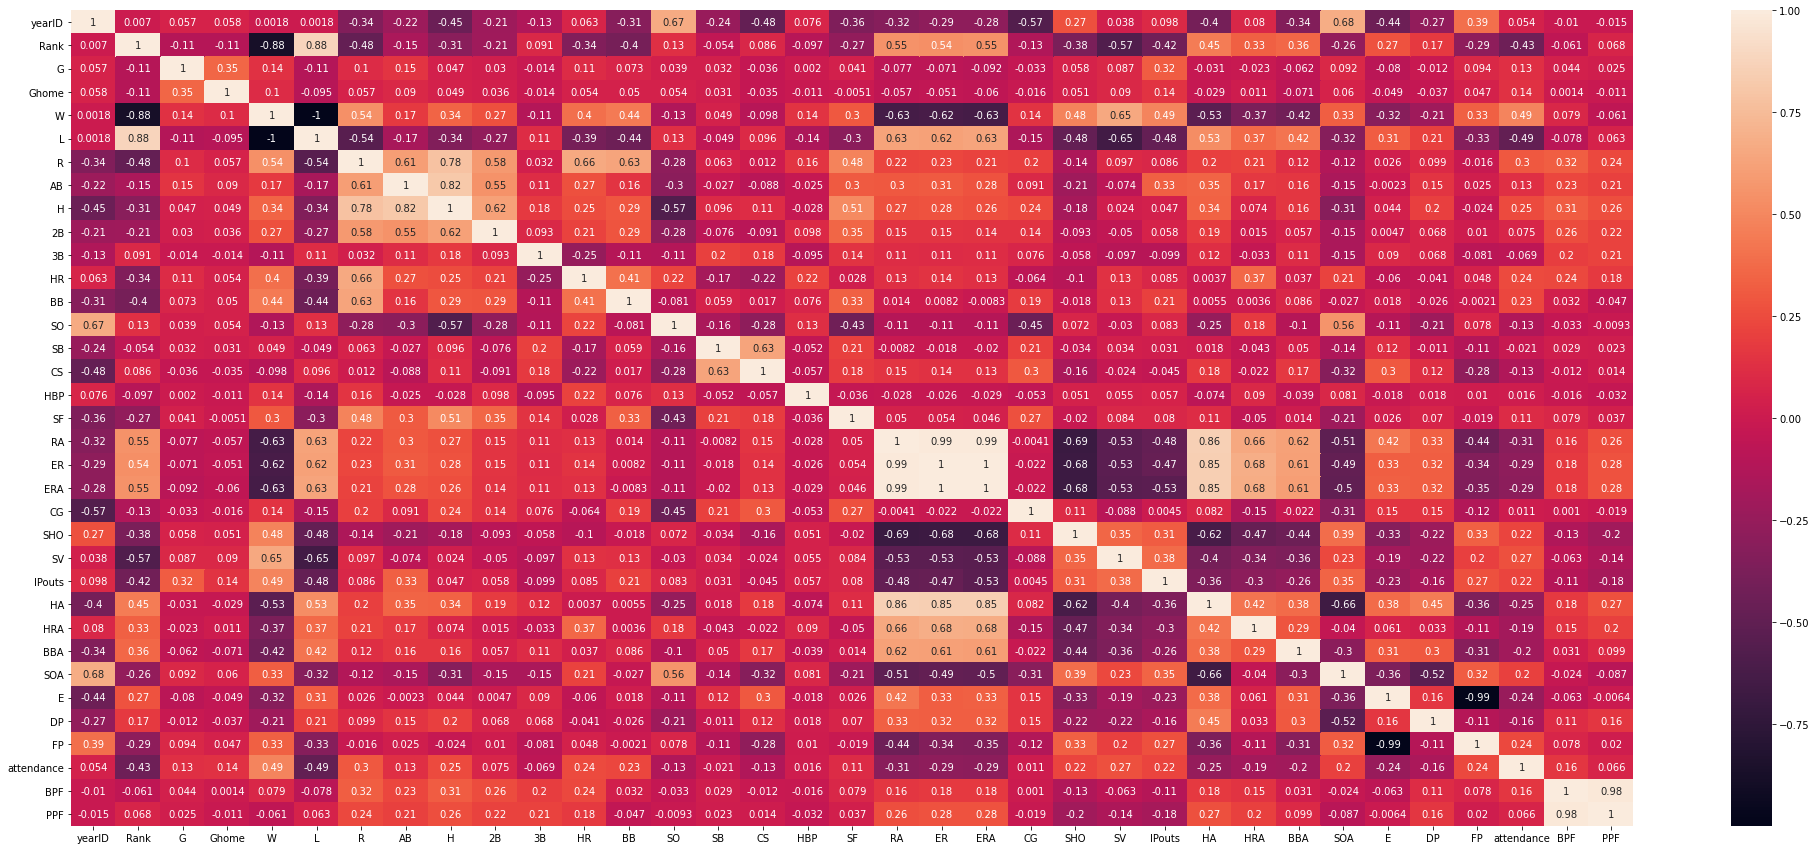

In [54]:
corr_matrix = data_remove_outliers[numeric_data.columns].corr()

plt.figure(figsize=(35, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

__Takeaways:__

- Our anlysis above is confirmed here as _RA_(-0.63), _ER_(-0.62), _ERA_(-0.63), and _HA_(-0.53) are all more strongly correlated to Wins than _H_(0.34), _R_(0.54), and _BB_(0.44)
- _RA_, _ER_, and _ERA_ are all extremely colinear as they are all different ways of expressing the same concept (prevent runs from scoring)
- Similarly, _R_, _H_, _HR_, and _BB_ are all highly colinear as they are all part of run scoring
- _yearID_, _G_, _Ghome_, _AB_, _3B_, _SO_, _SB_, _CS_, _CG_, _HBP_, BPF_, and _PPF_ can all be removed as they have almost no correlation to Wins

In [65]:
data_strong_corr = data_strong_corr.drop(['yearID', 'G', 'Ghome', 'AB', '3B', 'SO', 'SB', 'CS', 'HBP', 'BPF', 'PPF'], axis=1)
data_strong_corr.head()

,Rank,W,L,DivWin,WCWin,LgWin,WSWin,R,H,2B,HR,BB,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance
2209,1,96,66,Y,N,Y,N,773,1514,264,197,530.0,50.0,648,575,3.52,14,9,46,4407,1372,120,451,1245,130,143,0.980,2901242.0
2210,2,88,74,N,Y,N,N,949,1557,299,257,645.0,67.0,903,839,5.14,13,1,44,4406,1604,209,597,1047,97,173,0.984,3646950.0
2211,3,85,77,N,N,N,N,928,1631,308,209,642.0,47.0,921,807,4.98,17,5,37,4374,1606,185,722,1165,135,152,0.978,2315231.0
2212,4,70,91,N,N,N,N,762,1571,256,192,527.0,33.0,943,847,5.30,12,8,38,4317,1546,219,662,1052,128,156,0.979,1820521.0
2213,2,85,77,N,N,N,N,898,1586,284,195,701.0,62.0,794,733,4.52,7,4,43,4383,1529,174,616,1039,109,145,0.982,1676403.0


In [66]:
numeric_data = data_strong_corr.loc[:, data_strong_corr.dtypes != np.object]
numeric_data.shape

(716, 24)

#4) Feature Engineering

Now, we get to the feature engineering section of our analysis. This is where we use various techniques to determine what features are the best ones to include in our model. We're going to use Recursive Feature Elimination with Cross Validation (RFECV) and Variable Inflation Factor (VIF) to isolate our most important features.

## Get Dummy Variables

Before we perform either of those techniques, we have to make our categorical variables useable for these methods. To this, we're going to create dummy variables which give each category a numeric representation to be used in numerical modeling.

In [67]:
data_with_dummies = pd.get_dummies(data_strong_corr, prefix_sep="_", columns=categorical_data.columns, drop_first=True)

data_with_dummies.head()

,Rank,W,L,R,H,2B,HR,BB,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y
2209,1,96,66,773,1514,264,197,530.0,50.0,648,575,3.52,14,9,46,4407,1372,120,451,1245,130,143,0.980,2901242.0,1,0,1,0
2210,2,88,74,949,1557,299,257,645.0,67.0,903,839,5.14,13,1,44,4406,1604,209,597,1047,97,173,0.984,3646950.0,0,1,0,0
2211,3,85,77,928,1631,308,209,642.0,47.0,921,807,4.98,17,5,37,4374,1606,185,722,1165,135,152,0.978,2315231.0,0,0,0,0
2212,4,70,91,762,1571,256,192,527.0,33.0,943,847,5.30,12,8,38,4317,1546,219,662,1052,128,156,0.979,1820521.0,0,0,0,0
2213,2,85,77,898,1586,284,195,701.0,62.0,794,733,4.52,7,4,43,4383,1529,174,616,1039,109,145,0.982,1676403.0,0,0,0,0


In [73]:
dummy_corr_matrix = data_with_dummies.corr()

corr_stack = dummy_corr_matrix.stack()

corr_stack[(corr_stack != 1.0) & (abs(corr_stack) > 0.65)]

Rank      W          -0.879602
          L           0.879928
          DivWin_Y   -0.696641
W         Rank       -0.879602
          L          -0.999574
          SV          0.653865
L         Rank        0.879928
          W          -0.999574
          SV         -0.653951
R         H           0.782331
          HR          0.663814
H         R           0.782331
HR        R           0.663814
RA        ER          0.989268
          ERA         0.988053
          SHO        -0.692645
          HA          0.858630
          HRA         0.655281
ER        RA          0.989268
          ERA         0.997944
          SHO        -0.683431
          HA          0.851466
          HRA         0.680578
ERA       RA          0.988053
          ER          0.997944
          SHO        -0.681006
          HA          0.846330
          HRA         0.676599
SHO       RA         -0.692645
          ER         -0.683431
          ERA        -0.681006
SV        W           0.653865
        

__Takeaways:__

- We don't have any incredibly strong correlations (aside Rank and L which meassures the same thing as W), but _SV_ has a 0.65 correlation to Wins and if we lowered our qualification to 0.6 we'd introduce quite a few more high correlations.
- _RA_ and _R_ both have a lot of highly collinear features

## Train/Test Split

We'll now split our data into training and testing sets to be able to effectively build our model down the road. We'll use a 70/30 split for this analysis (70% - train/30% - test)

In [74]:
# drop W, L, and Rank bc they all meassure Wins
X = data_with_dummies.drop(['W', 'L', 'Rank'], axis=1)
y = data_with_dummies[['W']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

x_train.head()

,R,H,2B,HR,BB,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y
2373,804,1488,289,203,519.0,43.0,713,649,4.02,7,9,57,4354,1429,158,465,1266,109,132,0.982,3264907.0,1,0,1,0
2864,819,1477,311,215,542.0,45.0,672,623,3.88,3,5,46,4340,1300,189,495,1457,86,139,0.985,2524980.0,1,0,0,0
2215,778,1398,259,191,604.0,49.0,773,692,4.32,6,8,52,4329,1447,167,591,1089,121,145,0.980,1861428.0,0,0,0,0
2634,751,1515,308,152,546.0,41.0,743,690,4.30,6,5,32,4333,1445,142,537,1056,109,171,0.982,2461237.0,0,0,0,0
2419,961,1667,371,238,620.0,64.0,809,729,4.48,5,6,36,4394,1503,153,488,1141,113,130,0.982,2724165.0,0,1,0,0


## Scale Data

Now, we'll apply a `StandardScaler()` to make sure we're comparing apples to apples

In [77]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

# get numeric columns
numeric_data.drop(['W', 'L', 'Rank'], axis=1, inplace=True)
numeric_columns_list = list(numeric_data.columns)

# scale training data
x_train[numeric_columns_list] = x_train[numeric_columns_list].astype('float64')
x_train[numeric_columns_list] = [scaler.fit_transform(x_train[col].values.reshape(-1,1)) for col in numeric_columns_list]

x_train.head()

,R,H,2B,HR,BB,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y
2373,0.549557,0.420062,-0.004794,0.731114,-0.185906,-0.217605,-0.381910,-0.459630,-0.484688,0.401171,-0.043900,2.190875,0.416503,-0.171637,-0.557528,-0.967565,0.752093,0.336343,-0.882919,-0.354658,1.169226,1,0,1,0
2864,0.718616,0.293409,0.772278,1.051319,0.132588,0.005568,-0.833800,-0.770440,-0.743626,-0.616483,-1.043616,0.677664,0.068764,-1.506660,0.553736,-0.515920,1.958687,-0.973892,-0.507052,0.707196,0.140354,1,0,0,0
2215,0.256523,-0.616188,-1.064439,0.410909,0.991138,0.451915,0.279393,0.054403,0.070180,0.146758,-0.293829,1.503052,-0.204459,0.014646,-0.234903,0.929342,-0.366060,1.019943,-0.184879,-1.062560,-0.782317,0,0,0,0
2634,-0.047782,0.730936,0.666314,-0.629758,0.187979,-0.440779,-0.051259,0.030494,0.033189,0.146758,-1.043616,-1.248241,-0.105105,-0.006052,-1.131084,0.116382,-0.574529,0.336343,1.211201,-0.354658,0.051719,0,0,0,0
2419,2.319033,2.481047,2.891567,1.665046,1.212699,2.125717,0.676174,0.496710,0.366109,-0.107656,-0.793687,-0.697983,1.410042,0.594191,-0.736764,-0.621304,-0.037563,0.564210,-0.990310,-0.354658,0.417322,0,1,0,0


In [78]:
# scale testing data
x_test[numeric_columns_list] = x_test[numeric_columns_list].astype('float64')
x_test[numeric_columns_list] = [scaler.fit_transform(x_test[col].values.reshape(-1,1)) for col in numeric_columns_list]

x_test.head()

,R,H,2B,HR,BB,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y
2655,-0.076049,-1.003013,0.377593,0.092000,0.098450,-1.203273,-0.979169,-0.957629,-0.912603,-0.089783,0.880878,2.497452,-0.153354,-0.421406,-0.471749,-1.288220,-0.570513,-0.749200,-0.975646,0.702044,-0.405331,1,0,0,0
2438,-0.750956,0.051590,-1.026812,-1.182263,0.551927,-0.166615,0.806791,0.912554,0.960562,-0.787491,0.343605,-1.294782,-1.051884,0.070876,1.112023,1.158718,-0.355730,-0.051893,-0.421887,-0.028898,-0.517097,0,0,0,0
2220,0.204101,0.088812,0.533638,-1.153303,0.405214,1.330779,0.394646,0.096475,0.085251,1.770774,-1.268215,-0.732969,0.121197,0.999500,-0.633359,0.116235,0.112886,2.040030,-1.031022,-1.856252,-0.597488,0,0,0,0
2745,-1.553204,-0.730057,-0.948790,-1.471869,-1.675447,-0.857720,-0.133744,-0.118880,-0.107317,-0.787491,-1.268215,-0.732969,-0.078476,0.171570,-0.633359,-0.897289,0.861369,-0.110002,-0.089632,-0.028898,-0.452356,0,0,0,0
2922,0.929944,-0.792092,0.494626,1.568987,0.138463,0.063753,1.303477,1.297926,1.293180,-0.322352,0.074968,-1.013875,-0.552700,0.708606,2.178646,0.753308,1.518733,0.122434,-0.311135,-0.394369,-0.364447,0,0,0,0


## Collinearity

Now, let's look at the correlation between our independant variables

In [80]:
corr_result = x_train.corr()
corr_result = corr_result.stack()

corr_result[(corr_result != 1.0)&(abs(corr_result) > 0.8)]

RA   ER     0.988753
     ERA    0.987671
     HA     0.857461
ER   RA     0.988753
     ERA    0.997836
     HA     0.850679
ERA  RA     0.987671
     ER     0.997836
     HA     0.844351
HA   RA     0.857461
     ER     0.850679
     ERA    0.844351
E    FP    -0.987892
FP   E     -0.987892
dtype: float64

__Takeaways:__

- It looks like _RA_ is highly collinear with a few variables, as is _ER_, _ERA_, and _HA_
- It makes sense that _E_ and _FP_ would be highly collinear because they're different ways of expressing the same thing ($FP = E/Opp$)

## RFECV

Now that we have our data properly scaled, let's perform a recursive feature elimination with cross validation. This essentially builds a model based on the entire data set and recursively eliminates features until it finds the optimal combination of features and returns those variables.

In [172]:
# start by initiating a model and fitting it to our data
cv_regressor = LinearRegression()
cv_regressor.fit(x_train, y_train.values.ravel())

# create the RFECV object and fit it to our data
cv_selector = RFECV(cv_regressor, cv=10, step=1)
cv_selector = cv_selector.fit(x_train, y_train.values.ravel())

# create rfecv mask
rfecv_mask = cv_selector.get_support()

In [264]:
rfecv_features = []

# collect and store optimal features
for keep, feature in zip(rfecv_mask, x_train.columns):
  if keep:
    rfecv_features.append(feature)

print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)

Optimal number of features : 12
Best features : ['R', 'RA', 'ER', 'ERA', 'SHO', 'SV', 'E', 'FP', 'DivWin_Y', 'WCWin_Y', 'LgWin_Y', 'WSWin_Y']


## VIF

Next, we'll perform a variable inflation factor to test for multicollinearity. This tests the variables against each other and tells you if they are collinear with another variable in the set. Any VIF above 10 indicates a high level of collinearity and suggests that feature is redundant.

In [177]:
x_train_vif = x_train[['R', 'RA', 'ER', 'ERA', 'SHO', 'SV', 'E', 'FP', 'DivWin_Y', 'WCWin_Y', 'LgWin_Y', 'WSWin_Y']]

In [178]:
team_data_vif = sm.add_constant(x_train_vif)

vif_df = pd.DataFrame()
vif_df["VIF Factor"] = [variance_inflation_factor(team_data_vif.values, i) for i in range(team_data_vif.shape[1])]
vif_df["features"] = team_data_vif.columns
vif_df.round(1)

,VIF Factor,features
0,1.9,const
1,1.7,R
2,99.4,RA
3,335.3,ER
4,271.6,ERA
5,2.0,SHO
6,1.6,SV
7,48.3,E
8,47.2,FP
9,2.0,DivWin_Y


We have a few high VIFs. Let's go through them.

- _RA_, _ER_, and _ERA_ all meassure the same thing so we don't need all 3 variables. Let's just keep _RA_ and see how that affects the VIF.
- _E_ and _FP_ also meassure the same things so let's keep _FP_.

Let's run the VIF again with our new feature set and see where we are

In [184]:
team_data_vif2 = x_train_vif[['R', 'RA', 'SHO', 'SV', 'FP', 'DivWin_Y', 'WCWin_Y', 'LgWin_Y', 'WSWin_Y']]

vif_df2 = pd.DataFrame()
vif_df2["VIF Factor"] = [variance_inflation_factor(team_data_vif2.values, i) for i in range(team_data_vif2.shape[1])]
vif_df2["features"] = team_data_vif2.columns
vif_df2.round(1)


,VIF Factor,features
0,1.4,R
1,3.2,RA
2,2.0,SHO
3,1.5,SV
4,1.3,FP
5,1.6,DivWin_Y
6,1.2,WCWin_Y
7,2.9,LgWin_Y
8,2.6,WSWin_Y


It looks like we no longer have any features with high collinearity. Let's move forward with this data set

## Set Final Features

Based on our feature engineering, our final features are:

|Variable|
|-----|
|R|
|RA|
|SHO|
|SV|
|FP|
|DivWin_Y|
|WCWin_Y|
|LgWin_Y|
|WSWin_Y|

In [185]:
final_features = ['R', 'RA', 'SHO', 'SV', 'FP', 'DivWin_Y', 'WCWin_Y', 'LgWin_Y', 'WSWin_Y']

# set training and test sets to our final features
x_train_final = x_train[final_features]
x_test_final = x_test[final_features]

team_data_final = data_with_dummies[['R', 'RA', 'SHO', 'SV', 'FP', 'DivWin_Y', 'WCWin_Y', 'LgWin_Y', 'WSWin_Y', 'W']]

#5) Model Building

Now, it's time to start building our models. We're going to build 4 separate models and compare them to each other to choose our final model.

In [187]:
# initialize model_stats to keep track of each model's performance metrics
model_stats = {}

## Linear Model

We'll start with the simple linear model. This is a basic model that creates a regression line fit to our dataset and predicts our independant variable based on that line.

### Linear Model 1

We'll start by building our model and fitting it to our data

In [267]:
linear_model = LinearRegression()
linear_model.fit(x_train_final, y_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's check our performance using a 10-fold cross validation with $R^2$

In [268]:
linear_scores = cross_val_score(linear_model, x_train_final, y_train, cv=10)

print(linear_scores)
print("Mean Accuracy:", np.mean(linear_scores))

[0.94447032 0.95411871 0.92734604 0.96305887 0.89907357 0.88189107
 0.92368796 0.94421311 0.91373365 0.9585026 ]
Mean Accuracy: 0.931009589936559


In [269]:
# check performance on unseen data
lin_unseen_score = linear_model.score(x_test_final, y_test)
lin_unseen_score

0.8951694407911324

Let's also perform a 10-fold cross validation for RMSE

In [191]:
linear_mse_scores = cross_val_score(linear_model, x_train_final, y_train, cv=10, scoring='neg_mean_squared_error')
linear_mse_scores = np.sqrt(-linear_mse_scores)

print(linear_mse_scores)
print("Mean Accuracy:", np.mean(linear_mse_scores))

[2.70476273 2.56224132 2.89417957 2.52873393 3.34156486 3.6039412
 3.31315528 2.78123648 3.49923009 2.54615522]
Mean Accuracy: 2.9775200692276416


Now, we'll make an OLS model to get our sumamry stats

In [266]:
df_with_constant = sm.add_constant(x_train_final)

result = sm.OLS(y_train, df_with_constant).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     810.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          3.32e-288
Time:                        19:31:29   Log-Likelihood:                -1252.6
No. Observations:                 501   AIC:                             2525.
Df Residuals:                     491   BIC:                             2567.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.7196      0.183    441.670      0.0

In [192]:
linear_model_pred = linear_model.predict(x_test_final)
linear_model_pred

array([ 97.18909602,  67.27508181,  76.35454861,  67.34595962,
        76.67809889,  99.13236689,  79.76430979,  67.69846895,
        72.10259497,  67.64543971,  86.46876662,  98.97005255,
        88.34376299,  76.34241463,  86.87780234,  94.0491034 ,
       107.69343649,  81.14708664,  81.86884896,  84.06450559,
        91.70256426, 100.81896429,  71.28877464,  86.62885223,
        84.49740374,  66.36554855,  74.44878484,  87.35416521,
        87.57764938,  94.44778079,  94.58066312,  70.73073598,
        78.92997907,  92.7426964 ,  80.67986702,  88.18889261,
        69.81120243,  65.14506681,  71.97532881,  50.02546114,
        92.97545373,  67.84003533,  88.08679512, 100.84371866,
        99.93254176, 104.1820764 ,  89.75609075,  69.72703308,
        95.61682167,  67.78645888,  73.0455323 ,  94.97345668,
        69.20626596,  85.43317115,  71.64513086,  93.29628411,
        72.05904313,  79.61254175,  68.50896701,  75.94321437,
        85.403891  ,  62.51099024,  92.39056215,  80.98

__Takeaways:__

- This model performs pretty well. We get an $R^2$ of 0.931 in our sklearn model and 0.937 in OLS.
- A RMSE of 2.978 is good given that we're dealing with data ranging from ~60 to 105.
- We have 3 features with a p-value over 0.05 (_FP_, _LgWin_Y_, _WSWin_Y_). Let's remove those variables and see what happens

### Linear Model 2

Now, we'll build a new model without the 3 features with high p-values.

Update feature set

In [193]:
final_features2 = ['R', 'RA', 'SHO', 'SV', 'DivWin_Y', 'WCWin_Y']

x_train_final2 = x_train_final[final_features2]
x_test_final2 = x_test_final[final_features2]

In [270]:
linear_model2 = LinearRegression()
linear_model2.fit(x_train_final2, y_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
linear_scores2 = cross_val_score(linear_model2, x_train_final2, y_train, cv=10)

print(linear_scores2)
print("Mean Accuracy:", np.mean(linear_scores2))

[0.94391975 0.95472632 0.92763842 0.96261542 0.90111596 0.88080756
 0.92421407 0.94609477 0.91346188 0.95855134]
Mean Accuracy: 0.9313145497722406


In [195]:
lin_unseen_score2 = linear_model2.score(x_test_final2, y_test)
lin_unseen_score2

0.8953542659037707

In [196]:
df_with_constant2 = sm.add_constant(x_train_final2)

result2 = sm.OLS(y_train, df_with_constant2).fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1219.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          2.28e-292
Time:                        19:04:24   Log-Likelihood:                -1253.5
No. Observations:                 501   AIC:                             2521.
Df Residuals:                     494   BIC:                             2551.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.7101      0.182    442.427      0.0

In [197]:
linear_mse_scores2 = cross_val_score(linear_model2, x_train_final2, y_train, cv=10, scoring='neg_mean_squared_error')
linear_rmse_scores2 = np.sqrt(-linear_mse_scores2)

print(linear_rmse_scores2)
print("Mean Accuracy:", np.mean(linear_rmse_scores2))

[2.7181384  2.5452187  2.88835011 2.54386629 3.30758143 3.62043438
 3.30171483 2.73392931 3.50473765 2.54465961]
Mean Accuracy: 2.970863069001588


In [198]:
linear_model_pred2 = linear_model2.predict(x_test_final2)
linear_model_pred2

array([ 97.03488802,  67.22055088,  76.64553551,  67.34650248,
        76.66129959,  98.99388956,  79.61792274,  67.68472471,
        72.11248665,  67.58380364,  86.4339987 ,  98.81093115,
        88.24728717,  76.31078615,  86.83139845,  93.96156394,
       108.18177931,  81.03671719,  81.81519516,  83.88923285,
        91.57045714, 101.04110959,  71.22020805,  86.97495131,
        84.27644841,  66.541333  ,  74.48544815,  87.47030007,
        87.65019296,  95.11550705,  94.43612933,  70.69721296,
        79.18084778,  92.6386477 ,  80.81914971,  88.11544413,
        69.75024898,  65.08323082,  71.99991071,  50.20159199,
        93.43070791,  67.6436975 ,  87.92876672, 101.54184625,
        99.92671832, 104.2846228 ,  90.28335381,  69.82090146,
        95.51869262,  67.37730325,  73.38545332,  95.08216772,
        69.30720241,  85.36028597,  71.50802167,  93.49595276,
        71.99487081,  79.52759107,  68.30127627,  75.93184815,
        85.14239127,  62.65033012,  92.27583411,  81.07

__Takeaways:__

- This is just as good as the first model, while using fewer features. Therefore, we'll keep this model and save it to our dictionary

In [199]:
linear_stats = {}
linear_stats['accuracy'] = np.mean(linear_scores2)
linear_stats['unseen_accuracy'] = lin_unseen_score2
linear_stats['rmse'] = np.mean(linear_rmse_scores2)
linear_stats['predictions'] = linear_model_pred2
linear_stats['actual'] = y_test
linear_stats['verbose_name'] = "Linear Regression"

In [200]:
model_stats['linear'] = linear_stats

## SVR

Our second model is going to be a SVR, or Support Vector Regression. This is Linear Regression Model that creates a decision boundary a certain distance away from the regression line. Any data outside of those lines is not considered in the model.

### SVR Model 1

Let's start again with our first set of data

#### Hyperparameter Tuning

Before we build the model, we have to determine what parameters we're going to use. To do this, we'll perform hyperparameter tuning using cross validation. This takes in a grid of parameters and tests them all against each other, returing the optimal combination of parameters

In [201]:
#Create a dictionary of possible parameters
params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear', 'rbf'] }

#Create the GridSearchCV object
grid_clf = GridSearchCV(SVR(), params_grid, cv=10)

#Fit the data with the best possible parameters
grid_clf = grid_clf.fit(x_train_final, y_train.values.ravel())

#Print the best estimator with it's parameters
print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.9305194523696205


We'll do the same hyperparameter tuning for RMSE instead of $R^2$

In [202]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)
svr_gs = GridSearchCV(SVR(epsilon = 0.01), params_grid, scoring=scorer, cv=10)
svr_gs = svr_gs.fit(x_train_final, y_train.values.ravel())

print(svr_gs.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}


Because there's a discrepency in the C value, we'll use the $R^2$ value of 10 with a gamma of 0.0001 and a linear kernel

In [203]:
SVR_model = SVR(kernel='linear', C=10, gamma=0.0001)
SVR_model.fit(x_train_final, y_train.values.ravel())

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Get $R^2$ data

In [204]:
svr_scores = cross_val_score(SVR_model, x_train_final, y_train.values.ravel(), cv=10)
print(svr_scores)
print("Mean Accuracy:", np.mean(svr_scores))

[0.94052915 0.9533967  0.92713825 0.96405866 0.89646044 0.88309108
 0.92197349 0.94345023 0.91605164 0.9590449 ]
Mean Accuracy: 0.9305194523696205


In [205]:
SVR_model.score(x_test_final, y_test)

0.896133782095813

Get RMSE data

In [206]:
svr_mse_scores = cross_val_score(SVR_model, x_train_final, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
svr_mse_scores = np.sqrt(-svr_mse_scores)

print(svr_mse_scores)
print("Mean Accuracy:", np.mean(svr_mse_scores))

[2.79910175 2.58232284 2.89831528 2.49427993 3.38454748 3.58558602
 3.35016634 2.80018854 3.45189746 2.52946363]
Mean Accuracy: 2.9875869297389697


In [207]:
svr_model_pred = SVR_model.predict(x_test_final)
svr_model_pred

array([ 97.40532718,  67.06156245,  76.26753291,  67.57513046,
        76.29413007,  99.42121304,  79.42124564,  67.46256265,
        72.17409564,  67.38086706,  86.54095603,  99.12985991,
        88.53237256,  76.26377455,  87.02717113,  93.95179405,
       107.33502382,  81.24883134,  81.54666509,  83.92149315,
        92.05300865, 100.28181616,  71.30787737,  86.48962417,
        84.82315676,  66.15173662,  74.55298397,  87.41757018,
        87.53220223,  94.00469405,  94.94388283,  70.75437411,
        78.93160832,  92.9082078 ,  80.53722448,  88.14313752,
        69.72146097,  65.38365632,  72.12174714,  49.61542596,
        92.73940407,  67.71263072,  88.31671248, 100.39588865,
       100.03544192, 104.19156361,  89.05274172,  69.3905031 ,
        96.02942414,  67.71962634,  73.05809362,  94.95756267,
        69.48464104,  85.59506781,  71.53079048,  92.92377154,
        71.86679604,  79.57487082,  68.38017238,  76.01119576,
        85.36012599,  62.29208878,  92.49922982,  81.37

__Takeaways:__

- This performed very similarly to our linear regression with an $R^2$ of 0.931 and an RMSE of 2.988

### SVR Model 2

Let's see how the SVR model does with our second feature set

In [209]:
SVR_model2 = SVR(kernel='linear', C=10, gamma=0.0001)
SVR_model2.fit(x_train_final2, y_train.values.ravel())

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [210]:
svr_scores2 = cross_val_score(SVR_model2, x_train_final2, y_train.values.ravel(), cv=10)
print(svr_scores2)
print("Mean Accuracy:", np.mean(svr_scores2))

[0.94185707 0.95497412 0.9275526  0.96328341 0.89908063 0.88100448
 0.92239663 0.94742159 0.91452061 0.95928412]
Mean Accuracy: 0.9311375260724644


In [211]:
svr_unseen_score2 = SVR_model2.score(x_test_final2, y_test)
svr_unseen_score2

0.8959598215453262

In [212]:
svr_mse_scores2 = cross_val_score(SVR_model2, x_train_final2, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
svr_rmse_scores2 = np.sqrt(-svr_mse_scores2)

print(svr_rmse_scores2)
print("Mean Accuracy:", np.mean(svr_rmse_scores2))

[2.76767488 2.53824382 2.89006236 2.52103675 3.34144802 3.6174425
 3.34106984 2.70007325 3.48323282 2.52206538]
Mean Accuracy: 2.972234961846959


In [213]:
svr_model_pred2 = SVR_model2.predict(x_test_final2)
svr_model_pred2

array([ 96.98899784,  67.07298255,  76.70908125,  67.60406585,
        76.34218597,  99.234696  ,  79.31221629,  67.50089913,
        72.15070267,  67.41558495,  86.58828239,  98.89462441,
        88.42642651,  76.270973  ,  86.79755081,  93.95205693,
       108.11470134,  81.21802344,  81.57477587,  83.65316394,
        91.77756317, 100.57175932,  71.17380021,  87.05721868,
        84.48996449,  66.42645059,  74.60699323,  87.4900717 ,
        87.49197974,  95.13159173,  94.70609015,  70.69698707,
        79.23510393,  92.76519625,  80.67129697,  87.89759504,
        69.66075755,  65.35947686,  72.19776942,  49.91424686,
        93.5485698 ,  67.47911905,  88.1706321 , 101.60575126,
        99.95843325, 104.03296827,  90.03189483,  69.39789124,
        95.72969928,  67.14335224,  73.63395587,  95.04557777,
        69.63194683,  85.59587818,  71.39397104,  93.47818939,
        71.86761349,  79.50618181,  68.15372563,  75.98969213,
        85.06355404,  62.59318271,  92.21397116,  81.51

__Takeaways:__

- Again, this performed just as well as the first model so we'll keep this and store the performance results in our dictionary

In [214]:
svr_stats = {}
svr_stats['accuracy'] = np.mean(svr_scores2)
svr_stats['unseen_accuracy'] = svr_unseen_score2
svr_stats['rmse'] = np.mean(svr_rmse_scores2)
svr_stats['predictions'] = svr_model_pred2
svr_stats['actual'] = y_test
svr_stats['verbose_name'] = "Support Vector Regressor"

In [215]:
model_stats['svr'] = svr_stats

## Random Forest Regressor

Next up we have a Random Forest Regressor. This is an algorithm that creates _n_ independant decision trees to predict the dependant variable. It then takes an average of all those results and returns that as its prediction.

### RFR Model 1

Again, let's start with a model fit to our first feature set

#### Hyperparameter Tuning

Again, we're going to perform hyperparameter tuning to determine the optimal parameters

In [216]:
rfr_grid = {
    'bootstrap': [True],
    'max_depth': [100, 110],
    'max_features': [3, 4],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [300, 1000]}

rfr_search = GridSearchCV(RandomForestRegressor(), rfr_grid, cv=3)

#Fit the data with the best possible parameters
rfr_search = rfr_search.fit(x_train_final, y_train.values.ravel())

#Print the best estimator with it's parameters
print(rfr_search.best_params_)
print(rfr_search.best_score_)


{'bootstrap': True, 'max_depth': 110, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
0.8809825053569268


In [217]:
random_forest_model = RandomForestRegressor(max_depth=110, max_features=4,
                                            min_samples_leaf=3, min_samples_split=8,
                                            n_estimators=300, random_state=0)
random_forest_model.fit(x_train_final, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Let's check our $R^2$ results

In [218]:
rfr_scores = cross_val_score(random_forest_model, x_train_final, y_train.values.ravel(), cv=10 )

print(rfr_scores)
print("Mean Accuracy:", np.mean(rfr_scores))

[0.90774529 0.91447454 0.87369579 0.90892938 0.8526338  0.79727717
 0.8879913  0.91487382 0.88379138 0.91038296]
Mean Accuracy: 0.8851795416518063


And for unseen data

In [219]:
random_forest_model.score(x_test_final, y_test)

0.8516476950582278

Next, we'll check our RMSE

In [220]:
rfr_mse_scores = cross_val_score(random_forest_model, x_train_final, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
rfr_mse_scores = np.sqrt(-rfr_mse_scores)

print(rfr_mse_scores)
print("Mean Accuracy:", np.mean(rfr_mse_scores))

[3.4862689  3.49824265 3.81596806 3.97042675 4.03781476 4.72158327
 4.01394257 3.43560649 4.06135505 3.74170664]
Mean Accuracy: 3.8782915128677002


In [221]:
rfr_model_predict = random_forest_model.predict(x_test_final)
rfr_model_predict

array([ 94.2569313 ,  67.24390157,  77.61914993,  70.06474372,
        76.62724064,  96.52880949,  77.09773754,  67.25787144,
        70.9872564 ,  68.63051335,  89.43611859,  98.07419467,
        87.24242465,  78.30471565,  84.84128316,  88.78185226,
       100.50251646,  80.50918054,  79.10755155,  84.90934956,
        88.21266749,  94.60565935,  69.84358073,  85.81183353,
        84.28454979,  68.01086883,  72.93246625,  88.02038301,
        86.05719857,  94.26394161,  91.90462377,  71.9766242 ,
        78.31797248,  93.25345312,  82.10748035,  89.97486958,
        68.70060761,  68.21096592,  74.33512104,  55.78463266,
        95.05134204,  68.7971166 ,  86.03790963,  96.93695198,
        96.09833748,  98.30608535,  90.6891413 ,  74.56499148,
        95.00962902,  69.20682312,  71.43105317,  94.24908324,
        75.85055481,  87.15028121,  73.73492263,  91.56727549,
        73.54535746,  80.25543032,  69.20235854,  76.15857457,
        82.83126198,  63.20217484,  94.48579043,  80.93

###RFR Model 2

Our first RFR was a little underwhelming compared to our previous 2 models. Let's see how it performs on our second feature set

In [222]:
random_forest_model2 = RandomForestRegressor(max_depth=110, max_features=3,
                                            min_samples_leaf=3, min_samples_split=8,
                                            n_estimators=20, random_state=0)
random_forest_model2 = random_forest_model2.fit(x_train_final2, y_train.values.ravel())

In [223]:
rfr_scores2 = cross_val_score(random_forest_model2, x_train_final2, y_train.values.ravel(), cv=10 )

print(rfr_scores2)
print("Mean Accuracy:", np.mean(rfr_scores2))

[0.9177748  0.92656899 0.86133842 0.91327397 0.85021488 0.77799861
 0.88629289 0.90661089 0.88040343 0.90926764]
Mean Accuracy: 0.8829744517156918


In [224]:
rfr_unseen_score2 = random_forest_model2.score(x_test_final2, y_test)
rfr_unseen_score2

0.8447985020687616

In [225]:
rfr_mse_scores2 = cross_val_score(random_forest_model2, x_train_final2, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
rfr_rmse_scores2 = np.sqrt(-rfr_mse_scores2)

print(rfr_rmse_scores2)
print("Mean Accuracy:", np.mean(rfr_rmse_scores2))

[3.29131203 3.24146973 3.99828631 3.87456338 4.07081886 4.9409922
 4.04426018 3.59848715 4.12013226 3.76491821]
Mean Accuracy: 3.894524031200846


In [226]:
rfr_model_predict2 = random_forest_model2.predict(x_test_final2)
rfr_model_predict2

array([ 95.12847222,  66.83267552,  76.50196248,  68.90088523,
        76.37536242,  96.15890332,  78.57454004,  66.49630189,
        71.41907121,  67.70806832,  89.68868208,  98.66115065,
        89.33959249,  77.38354798,  84.45427128,  89.32395604,
       101.74358481,  78.56749008,  81.63254523,  84.80269078,
        88.41901335,  95.71679279,  69.35876818,  88.83297619,
        84.43050144,  69.60115079,  72.7793093 ,  88.21083708,
        85.41787338,  94.62216089,  91.76432831,  70.54865079,
        79.67180986,  93.97842567,  81.33272908,  91.8872619 ,
        69.67547272,  67.06632035,  73.3229209 ,  56.2347619 ,
        96.18416778,  70.20907662,  85.73345238,  97.03227931,
        96.31964466,  98.8223643 ,  92.5480482 ,  74.15272186,
        95.87186508,  68.30525974,  71.63311328,  93.5552904 ,
        74.83362734,  88.24460317,  72.69952922,  90.59333333,
        72.68312951,  79.07695707,  69.64041667,  74.88431582,
        80.55610209,  63.83465909,  95.42883658,  82.16

__Takeaways:__

- The second model didn't perform much better than the first ($R^2$: 0.88, RMSE: 3.89)
- We probably won't use this model in the final model, but let's save its performance metrics just in case.

In [227]:
rfr_stats = {}
rfr_stats['accuracy'] = np.mean(rfr_scores2)
rfr_stats['unseen_accuracy'] = rfr_unseen_score2
rfr_stats['rmse'] = np.mean(rfr_rmse_scores2)
rfr_stats['predictions'] = rfr_model_predict2
rfr_stats['actual'] = y_test
rfr_stats['verbose_name'] = "Random Forest Regressor"

In [228]:
model_stats['rfr'] = rfr_stats

## Ridge Regression

Our final model will be a ridge regression model. This is a regression model that tries to improve on the OLS linear regression as it doesn't require unbiased estimators

### Ridge Model 1

We'll start by fitting our ridge model with our first feature set

In [229]:
ridge_model = Ridge(alpha=1.0)
ridge_model = ridge_model.fit(x_train_final, y_train.values.ravel())

Get $R^2$ for seen and unseen data

In [230]:
ridge_scores = cross_val_score(ridge_model, x_train_final, y_train.values.ravel(), cv=10)

print(ridge_scores)
print("Mean Accuracy:", np.mean(ridge_scores))

[0.94411061 0.9539061  0.92746352 0.96284431 0.89960921 0.88204129
 0.92404757 0.94446094 0.91415708 0.95835759]
Mean Accuracy: 0.9310998204671748


In [231]:
ridge_model.score(x_test_final, y_test)

0.8950958078930542

GET RMSE

In [232]:
ridge_mse_scores = cross_val_score(ridge_model, x_train_final, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(-ridge_mse_scores)

print(ridge_rmse_scores)
print("Mean RMSE:", np.mean(ridge_rmse_scores))

[2.7135092  2.56817105 2.89183868 2.53606702 3.33268594 3.60164853
 3.30533975 2.77505191 3.49063161 2.55060018]
Mean RMSE: 2.9765543868792763


In [233]:
ridge_model_predict = ridge_model.predict(x_test_final)
ridge_model_predict

array([ 97.1735536 ,  67.30644018,  76.33329863,  67.34988062,
        76.70005132,  99.06364674,  79.7735273 ,  67.72176689,
        72.10966108,  67.66552933,  86.40377903,  98.92431857,
        88.33915718,  76.35371321,  86.90327825,  94.05305297,
       107.76991046,  81.18253741,  81.87681728,  84.11080266,
        91.74136664, 100.75585165,  71.30811185,  86.60849121,
        84.51948016,  66.37301948,  74.44294642,  87.36928856,
        87.60837117,  94.49670542,  94.52765454,  70.76368381,
        78.94876592,  92.68996222,  80.7050686 ,  88.17459838,
        69.83398095,  65.14657635,  71.99631239,  50.05315712,
        93.06127066,  67.88080514,  88.11952932, 100.87926806,
        99.86800036, 104.18379495,  89.8029617 ,  69.76452161,
        95.58613706,  67.84688434,  73.01648997,  94.91859274,
        69.22347546,  85.42456651,  71.65319495,  93.34336989,
        72.06371606,  79.6233228 ,  68.52845229,  75.96626363,
        85.42908598,  62.52247021,  92.40513304,  80.98

__Takeaways:__

- This model performed similarly to our other regression models with an $R^2$ of 0.931 and RMSE of 2.977
- Let's see how it does with our second feature set

### Ridge Model 2

Now, let's fit our ridge model with our second feature set

In [234]:
ridge_model2 = Ridge(alpha=1.0)
ridge_model2 = ridge_model2.fit(x_train_final2, y_train.values.ravel())

In [235]:
ridge_scores2 = cross_val_score(ridge_model2, x_train_final2, y_train.values.ravel(), cv=10)

print(ridge_scores2)
print("Mean Accuracy:", np.mean(ridge_scores2))

[0.94356265 0.95442761 0.92764261 0.96235933 0.90139012 0.88082624
 0.9246418  0.94611082 0.91387724 0.958509  ]
Mean Accuracy: 0.931334741975309


In [236]:
ridge_unseen_score2 = ridge_model2.score(x_test_final2, y_test)
ridge_unseen_score2

0.8953724554151966

In [237]:
ridge_mse_scores2 = cross_val_score(ridge_model2, x_train_final, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
ridge_rmse_scores2 = np.sqrt(-ridge_mse_scores2)

print(ridge_rmse_scores2)
print("Mean RMSE:", np.mean(ridge_rmse_scores2))

[2.7135092  2.56817105 2.89183868 2.53606702 3.33268594 3.60164853
 3.30533975 2.77505191 3.49063161 2.55060018]
Mean RMSE: 2.9765543868792763


In [238]:
ridge_model_predict2 = ridge_model2.predict(x_test_final2)
ridge_model_predict2

array([ 97.03059776,  67.25013439,  76.63996302,  67.34790694,
        76.68336505,  98.93796445,  79.61743979,  67.70679437,
        72.11599467,  67.60096839,  86.38997817,  98.77876523,
        88.23586376,  76.31984235,  86.85049084,  93.96434435,
       108.15905785,  81.07251074,  81.82090874,  83.92666494,
        91.60339883, 101.01404774,  71.23172678,  86.97828057,
        84.28447188,  66.55772874,  74.47815895,  87.49202856,
        87.68435189,  95.07475371,  94.39819059,  70.72806317,
        79.2164071 ,  92.6017605 ,  80.85315597,  88.11784916,
        69.7680001 ,  65.07816231,  72.02398608,  50.23816824,
        93.41680006,  67.672397  ,  87.95797619, 101.4907161 ,
        99.88182848, 104.24972718,  90.22971462,  69.86025926,
        95.50297867,  67.41157788,  73.37676134,  95.0555932 ,
        69.33112702,  85.34813158,  71.50457792,  93.42437883,
        71.99402021,  79.53291522,  68.30550986,  75.9543166 ,
        85.15331945,  62.67088431,  92.31085286,  81.08

__Takeaways:__

- Again, the performaces doesn't suffer in the second model, so we'll keep this one and store it in our dictionary

In [239]:
ridge_stats = {}
ridge_stats['accuracy'] = np.mean(ridge_scores2)
ridge_stats['unseen_accuracy'] = ridge_unseen_score2
ridge_stats['rmse'] = np.mean(ridge_rmse_scores2)
ridge_stats['predictions'] = ridge_model_predict2
ridge_stats['actual'] = y_test
ridge_stats['verbose_name'] = "Ridge Regression"

In [240]:
model_stats['ridge'] = ridge_stats

## Stacking

Finally, we're going to combine our 3 best models to try to make an even more effective model. We'll do this using a technique called stacking which tries to combine the predictions of _n_ models and get the best aggregate.

We'll start by defining the stack. We'll leave the Random Forest Regressor out since it performed the worst of the 4 models we tested

In [275]:
stack_estimators = [('svr', SVR_model2), ('lin', linear_model2), ('ridge', ridge_model2)]

reg_stack = StackingRegressor(estimators=stack_estimators)

Next, we'll fit the new stacked model with our data

In [276]:
reg_stack = reg_stack.fit(x_train_final2, y_train.values.ravel())

Now, let's check our $R^2$ results

In [277]:
stack_scores = cross_val_score(reg_stack, x_train_final2, y_train.values.ravel(), cv=10)

print(stack_scores)
print("Mean Accuracy:", np.mean(stack_scores))

[0.94374146 0.95471449 0.92768356 0.96246644 0.90134622 0.88058354
 0.9245255  0.94548029 0.9132713  0.95825701]
Mean Accuracy: 0.9312069804306488


And our unseen data $R^2$

In [244]:
stack_unseen_score = reg_stack.score(x_test_final2, y_test)
stack_unseen_score

0.8947173316853521

And finally, our RMSE

In [245]:
stack_mse_scores = cross_val_score(reg_stack, x_train_final2, y_train.values.ravel(), cv=10, scoring='neg_mean_squared_error')
stack_rmse_scores = np.sqrt(-stack_mse_scores)

print(stack_rmse_scores)
print("Mean RMSE:", np.mean(stack_rmse_scores))

[2.72245566 2.54555113 2.88744916 2.54893013 3.30372826 3.62383499
 3.29492403 2.7494676  3.50859481 2.55367844]
Mean RMSE: 2.9738614209925665


In [246]:
stack_predict = reg_stack.predict(x_test_final2)
stack_predict

array([ 97.08570434,  67.26373517,  76.61834361,  67.24356422,
        76.77309907,  98.9237711 ,  79.7164475 ,  67.73519105,
        72.08989611,  67.62583424,  86.37279371,  98.80588288,
        88.20413422,  76.32527413,  86.87286216,  93.99928822,
       108.25015125,  81.00972096,  81.90200362,  84.00048934,
        91.55550866, 101.21798937,  71.22776188,  86.96955779,
        84.22732822,  66.56389614,  74.43433875,  87.49803718,
        87.74265297,  95.11814537,  94.35946577,  70.70224051,
        79.18972828,  92.60399542,  80.8939282 ,  88.20613002,
        69.77247811,  64.96529529,  71.94083499,  50.25775183,
        93.41599823,  67.69251625,  87.89273359, 101.53590764,
        99.93173266, 104.39458892,  90.35121728,  69.96271242,
        95.47786699,  67.45113744,  73.29119096,  95.11088553,
        69.20250426,  85.29284455,  71.52730977,  93.48497349,
        72.02108497,  79.54051422,  68.32956446,  75.92392941,
        85.18892659,  62.64940593,  92.34829566,  80.94

__Takeaways:__

- This isn't a significant improvement over our individual models with an $R^2$ of 0.931 and RMSE of 2.974
- Let's store the performance results and compare our models.

In [247]:
stack_stats = {}
stack_stats['accuracy'] = np.mean(stack_scores)
stack_stats['unseen_accuracy'] = stack_unseen_score
stack_stats['rmse'] = np.mean(stack_rmse_scores)
stack_stats['predictions'] = stack_predict
stack_stats['actual'] = y_test
stack_stats['verbose_name'] = "Stack Regressor"

In [248]:
model_stats['stack'] = stack_stats

# 6) Model Comparison

Now, let's take a look at our performance metrics for each of our 5 models (4 models + the stacked model) and compare them to find the most effective model.

First, let's plot each model's predictions against the actual results and visualize each model's performance

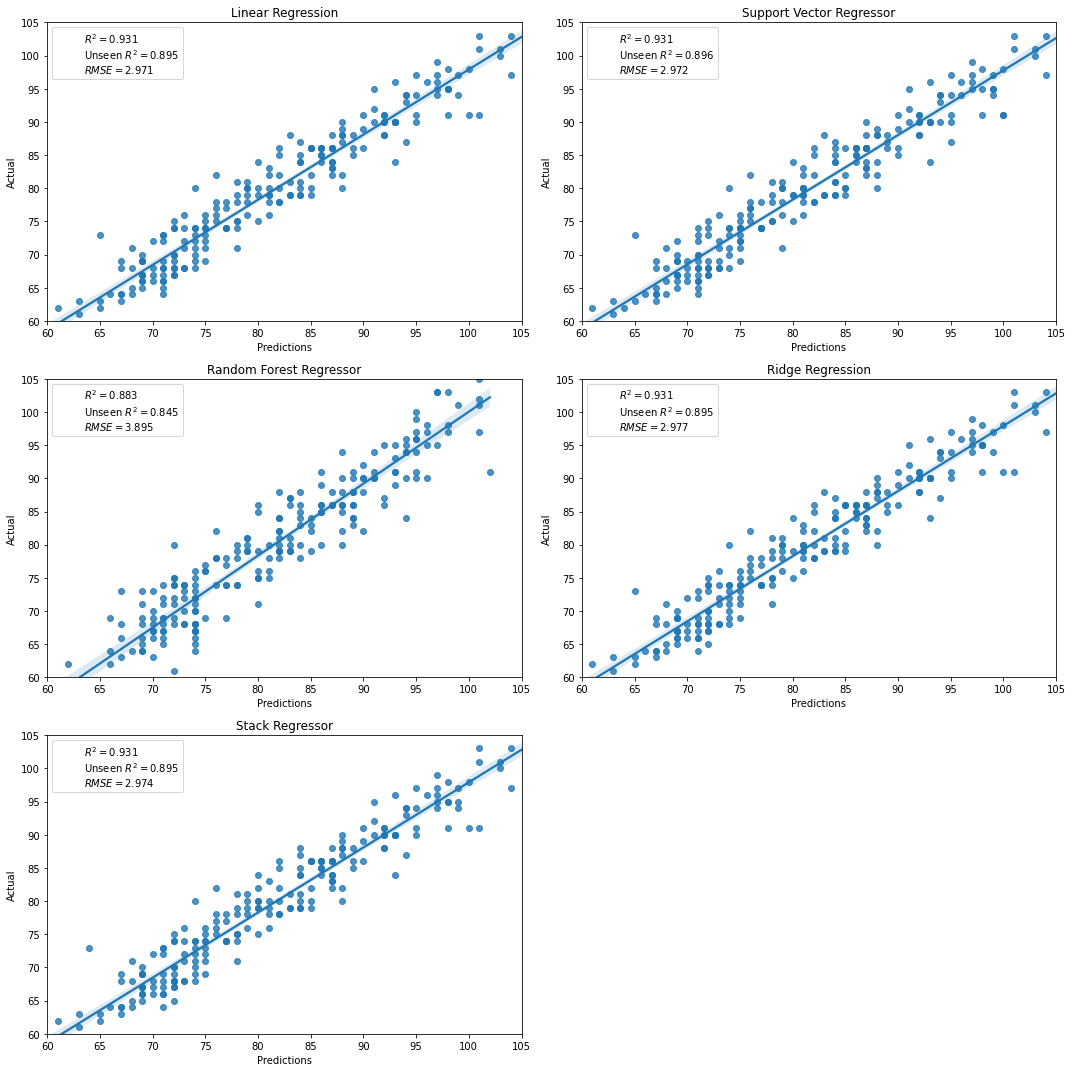

In [249]:
figure, axes = plt.subplots(3,2, figsize=(15,15))

x = 0
y = 0
for model in model_stats.keys():
  stats = model_stats[model]
  x_axis = stats['predictions'].astype(int)
  y_axis = stats['actual'].astype(int)
  plot = sns.regplot(x=x_axis, y=y_axis, ax=axes[x,y])
  plot.set(xlabel="Predictions", ylabel="Actual", title=stats['verbose_name'], xlim=(60, 105), ylim=(60,105))
  
  extras = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False, edgecolor='none', linewidth=0)
  legend_scores = (r'$R^2={:.3f}$' + '\n' + r'Unseen $R^2={:.3f}$' + '\n' + r'$RMSE={:.3f}$').format(stats['accuracy'], stats['unseen_accuracy'], stats['rmse'])
  plot.legend([extras], [legend_scores], loc='upper left')

  x = x + 1 if y == 1 else x
  y = y + 1 if y != 1 else 0

axes[2,1].set_axis_off()
figure.tight_layout()
plt.show()

__Takeaways:__

- These all look to have very similar performance and we're really just nitpicking.
- Random Forest is the obvious weak link of this bunch with significantly lower performance metrics

Now, let's plot each model on a scatter plot with its RMSE on one axis  and its $R^2$ on the other

In [252]:
rmse_scores = []
r2_scores = []
unseen_r2 = []

for model in model_stats.keys():
  stats = model_stats[model]
  rmse_scores.append(stats['rmse'])
  r2_scores.append(stats['accuracy'])
  unseen_r2.append(stats['unseen_accuracy'])

print(rmse_scores)
print(r2_scores)
print(unseen_r2)

[2.970863069001588, 2.972234961846959, 3.894524031200846, 2.9765543868792763, 2.9738614209925665]
[0.9313145497722406, 0.9311375260724644, 0.8829744517156918, 0.931334741975309, 0.9312069804306488]
[0.8953542659037707, 0.8959598215453262, 0.8447985020687616, 0.8953724554151966, 0.8947173316853521]


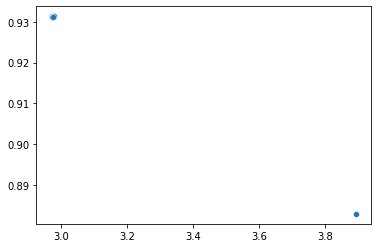

In [253]:
sns.scatterplot(x=rmse_scores, y=r2_scores)

__Takeaways:__

- The obvious outlier here is the random forest regressor (bottom right)
- The other 4 are bunched up in the top left, making it hard to differentiate

Let's zoom in on the graph to get a better idea of where each model stands

[(0.931, 0.9314), (2.97, 2.9775)]

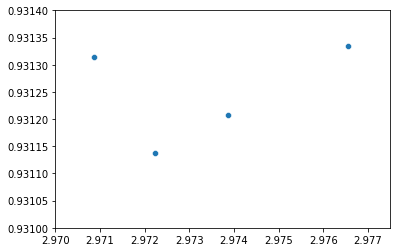

In [261]:
chart = sns.scatterplot(x=rmse_scores, y=r2_scores)
chart.set(ylim=(0.931, 0.9314), xlim=(2.97, 2.9775))

__Takeaways:__

- Again, all 4 models are so closely bunched together, and you'll get similar performance with any one you choose, but it looks like the linear regression model (top left) is ever so slightly better than the other 3.
- We're going to the linear regression model as our final model

# 7) Conclusion

We started with the question, "Can we accurately predict an MLB team's win total in a given season by analyzing their other statistics in that season?"

We explored our data, eliminated nulls and outliers, cutting our dataset down to cover 24 years (1996-2019). We then explored the distribution and correlation of that data to see if we can find any patterns.

We then performed feature enginnering, leveraging RFECV and VIF to isolate the optimal feature set for a linear regression. We came out of that with 8 features: _R_, _RA_, _SHO_, _SV_, _FP_, _DivWin_Y_, _WCWin_Y_, _LgWin_Y_, and _WSWin_Y_.

We then moved on to the model building portion of the analysis. There we built and compared 4 different models, LinearRegression, SVR, RFR, and Ridge. We discovered the random forest regressor performed significantly worse than the other 3.

Next, we combined the 3 best models (LinearRegression, SVR, and Ridge) in a new stacked model and compared the metrics of all 5 models (including the stack).

We came out that the best model was the second linear regression model. It included 6 features: _R_, _RA_, _SHO_, _SV_, _DivWin_Y_, _WCWin_Y_ and had an $R^2$ of 9.31 and RMSE of 2.71.

